In [1]:
# Import necessary libraries
import wandb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Login to wandb (if not already logged in)
wandb.login()

# Define the project and entity
project_name = "Negatives"
entity_name = "ntourne"

# Initialize the wandb API
api = wandb.Api()

# Fetch all runs from the project
runs = api.runs(f"{entity_name}/{project_name}")

wandb: Currently logged in as: ntourne to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [ ]:
# Initialize a list to store results
results = []

# Iterate through runs and extract metrics
for run in runs:
    # Get the summary metrics, config, and name of the run
    summary = run.summary._json_dict
    config = run.config
    name = run.name
    
    # Combine the data into a single dictionary
    run_data = {
        "run_name": name,
        "TF": config.get("TF"),
        "celltype": config.get("celltype"),
        "neg_mode": config.get("neg_mode"),
        "cross_val_set": config.get("cross_val_set"),
        "group_name": config.get("group_name"),
        "AUROC": summary.get("best_AUROC"),
        "AUROC_HQ": summary.get("best_AUROC_HQ"),
        "Accuracy": summary.get("best_Accuracy"),
        "Accuracy_HQ": summary.get("best_Accuracy_HQ"),
        "val_loss": summary.get("val_loss"),
    }
    results.append(run_data)

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

In [153]:
results_df = pd.DataFrame(results)

In [ ]:
results_df = results_df[results_df['group_name'] == "full_run_1"] # Only get prelim_run_1

In [ ]:
HQ_results = pd.DataFrame(results)
HQ_results = HQ_results[HQ_results['group_name'] == "full_run_1_HQ"]
HQ_results["neg_mode"] = "HQ training"

In [155]:
# Filter out entries where AUROC_HQ == 0 -> probably an issue with the cross val split 
filtered_out_count = results_df[(results_df['AUROC_HQ'] == 0) | (results_df['AUROC_HQ'].isna())].shape[0]

# Filter the DataFrame to exclude these entries
results_df = results_df[~((results_df['AUROC_HQ'] == 0) | (results_df['AUROC_HQ'].isna()))]

# Print the count of filtered-out entries
print(f"Number of entries where AUROC_HQ == 0: {filtered_out_count}")

Number of entries where AUROC_HQ == 0: 298


In [156]:
results_df[(results_df['AUROC_HQ'] == 1)]

,run_name,TF,celltype,neg_mode,cross_val_set,group_name,AUROC,AUROC_HQ,Accuracy,Accuracy_HQ,val_loss
1947,swift-oath-2241,RFX5_(200-401-194),GM12878,dinucl_sampled,0.0,full_run_1,0.916667,1.0,0.849057,0.531250,0.614180
1965,sweet-butterfly-2259,RFX5_(200-401-194),GM12878,neighbors,0.0,full_run_1,0.844612,1.0,0.725000,0.531250,1.034619
2113,northern-gorge-2407,ZEB1_(SC-25388),GM12878,neighbors,4.0,full_run_1,0.827671,1.0,0.632812,0.945312,0.686787
2671,lucky-universe-2965,MafK_(ab50322),HepG2,dinucl_sampled,4.0,full_run_1,0.999462,1.0,0.987578,0.957031,0.271520
2877,curious-waterfall-3171,RFX5_(200-401-194),HepG2,neighbors,0.0,full_run_1,0.854579,1.0,0.734375,0.566406,0.602612
3007,pretty-grass-3301,TEAD4_(SC-101184),HepG2,dinucl_sampled,4.0,full_run_1,0.851716,1.0,0.781250,0.785156,0.823468
3023,likely-energy-3317,TEAD4_(SC-101184),HepG2,neighbors,2.0,full_run_1,0.821855,1.0,0.761719,0.769531,0.696243
3025,sleek-totem-3319,TEAD4_(SC-101184),HepG2,neighbors,4.0,full_run_1,0.860946,1.0,0.781250,0.843750,0.612033
3050,winter-haze-3344,CEBPB_(SC-150),HepG2,neighbors,5.0,full_run_1,0.995154,1.0,0.933594,0.964844,0.261241
3061,zesty-sunset-3355,USF2,HepG2,dinucl_shuffled,4.0,full_run_1,0.984871,1.0,0.925781,0.898438,0.367537


Lots of fails!! This is probaby because of too small batches for the logging!!! 

In [157]:
#! THAT IS A LOT OF FAILS!!! INVESTIGATE!!!

In [158]:
results_df["TF"].value_counts() # this doesn't work now because there are multiple celltypes

TF
CTCF                   144
YY1_(SC-281)            96
USF-1                   96
ELF1_(SC-631)           96
Max                     96
ZBTB33                  80
ATF3                    80
MAZ_(ab85725)           72
SP1                     72
SRF                     72
TBP                     72
TCF7L2                  72
CEBPB_(SC-150)          72
Mxi1_(AF4185)           70
RFX5_(200-401-194)      64
SIX5                    64
TCF12                   64
USF2                    64
Nrf1                    64
ETS1                    64
JunD                    56
NF-YB                   48
Egr-1                   48
Znf143_(16618-1-AP)     48
MafF_(M8194)            48
MafK_(ab50322)          48
STAT5A_(SC-74442)       48
FOSL2                   48
ZBTB7A_(SC-34508)       48
TEAD4_(SC-101184)       48
NFIC_(SC-81335)         48
ELK1_(1277-1)           40
NF-YA                   40
BHLHE40                 40
FOXA1_(SC-101058)       40
RXRA                    40
MEF2A                   4

In [159]:
results_df["celltype_TF"] = results_df["celltype"]+"_"+results_df["TF"]# this doesn't work now because there are multiple celltypes

In [160]:
output = results_df["celltype_TF"].value_counts() # this doesn't work now because there are multiple celltypes

In [161]:
output.to_dict()

{'MCF-7_CTCF': 24,
 'MCF-7_TCF7L2': 24,
 'MCF-7_ZNF217': 24,
 'GM12878_CTCF': 24,
 'GM12878_YY1_(SC-281)': 24,
 'GM12878_TBP': 24,
 'GM12878_Egr-1': 24,
 'GM12878_MAZ_(ab85725)': 24,
 'GM12878_SRF': 24,
 'GM12878_SIX5': 24,
 'GM12878_ELK1_(1277-1)': 24,
 'GM12878_USF2': 24,
 'GM12878_Znf143_(16618-1-AP)': 24,
 'GM12878_USF-1': 24,
 'GM12878_SP1': 24,
 'GM12878_RFX5_(200-401-194)': 24,
 'GM12878_ELF1_(SC-631)': 24,
 'GM12878_ATF2_(SC-81188)': 24,
 'GM12878_NF-YB': 24,
 'GM12878_MEF2A': 24,
 'GM12878_TCF12': 24,
 'GM12878_ZEB1_(SC-25388)': 24,
 'GM12878_Pbx3': 24,
 'GM12878_Max': 24,
 'GM12878_STAT5A_(SC-74442)': 24,
 'GM12878_Nrf1': 24,
 'GM12878_NFIC_(SC-81335)': 24,
 'HepG2_RFX5_(200-401-194)': 24,
 'HepG2_Max': 24,
 'GM12878_CEBPB_(SC-150)': 24,
 'GM12878_FOXM1_(SC-502)': 24,
 'GM12878_ETS1': 24,
 'HepG2_SP1': 24,
 'HepG2_FOXA1_(SC-101058)': 24,
 'HepG2_CTCF': 24,
 'HepG2_USF-1': 24,
 'HepG2_Mxi1_(AF4185)': 24,
 'HepG2_ELF1_(SC-631)': 24,
 'HepG2_JunD': 24,
 'HepG2_YY1_(SC-281)': 24,

THese have issues!:
 'GM12878_RXRA': 16,
 'GM12878_ZBTB33': 16,
 'GM12878_ATF3': 16,
 'HepG2_Nrf1': 16,
 'HepG2_ZBTB33': 16,
 'HepG2_TCF12': 16,
 'GM12878_JunD': 8

In [162]:
# Filter out TFs with less than 24 samples
results_df = results_df.groupby('TF').filter(lambda x: len(x) >= 24)

In [163]:
results_df["celltype"].value_counts() 

celltype
K562       744
GM12878    742
HepG2      712
A549       320
MCF-7       72
HEK293      48
Name: count, dtype: int64

In [164]:
results_df["TF-neg_mode"] = results_df["TF"]+"_"+results_df["neg_mode"]
results_df["TF-neg_mode-celltype"] = results_df["TF"]+"_"+results_df["neg_mode"]+"_"+results_df["celltype"]

Now looking at the difference between HQ and normal AUROC. Best done per cell type because there is too much data!


In [166]:
tf_per_celltype = results_df.groupby("celltype")["TF"].nunique()
print(tf_per_celltype)

celltype
A549       14
GM12878    33
HEK293      2
HepG2      31
K562       33
MCF-7       3
Name: TF, dtype: int64


### K562

/tmp/ipykernel_2379175/432952792.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  celltype_df['TF'] = pd.Categorical(celltype_df['TF'], categories=tf_order, ordered=True)
/tmp/ipykernel_2379175/432952792.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  celltype_df['neg_mode'] = pd.Categorical(celltype_df['neg_mode'], categories=neg_sampling_order, ordered=True)


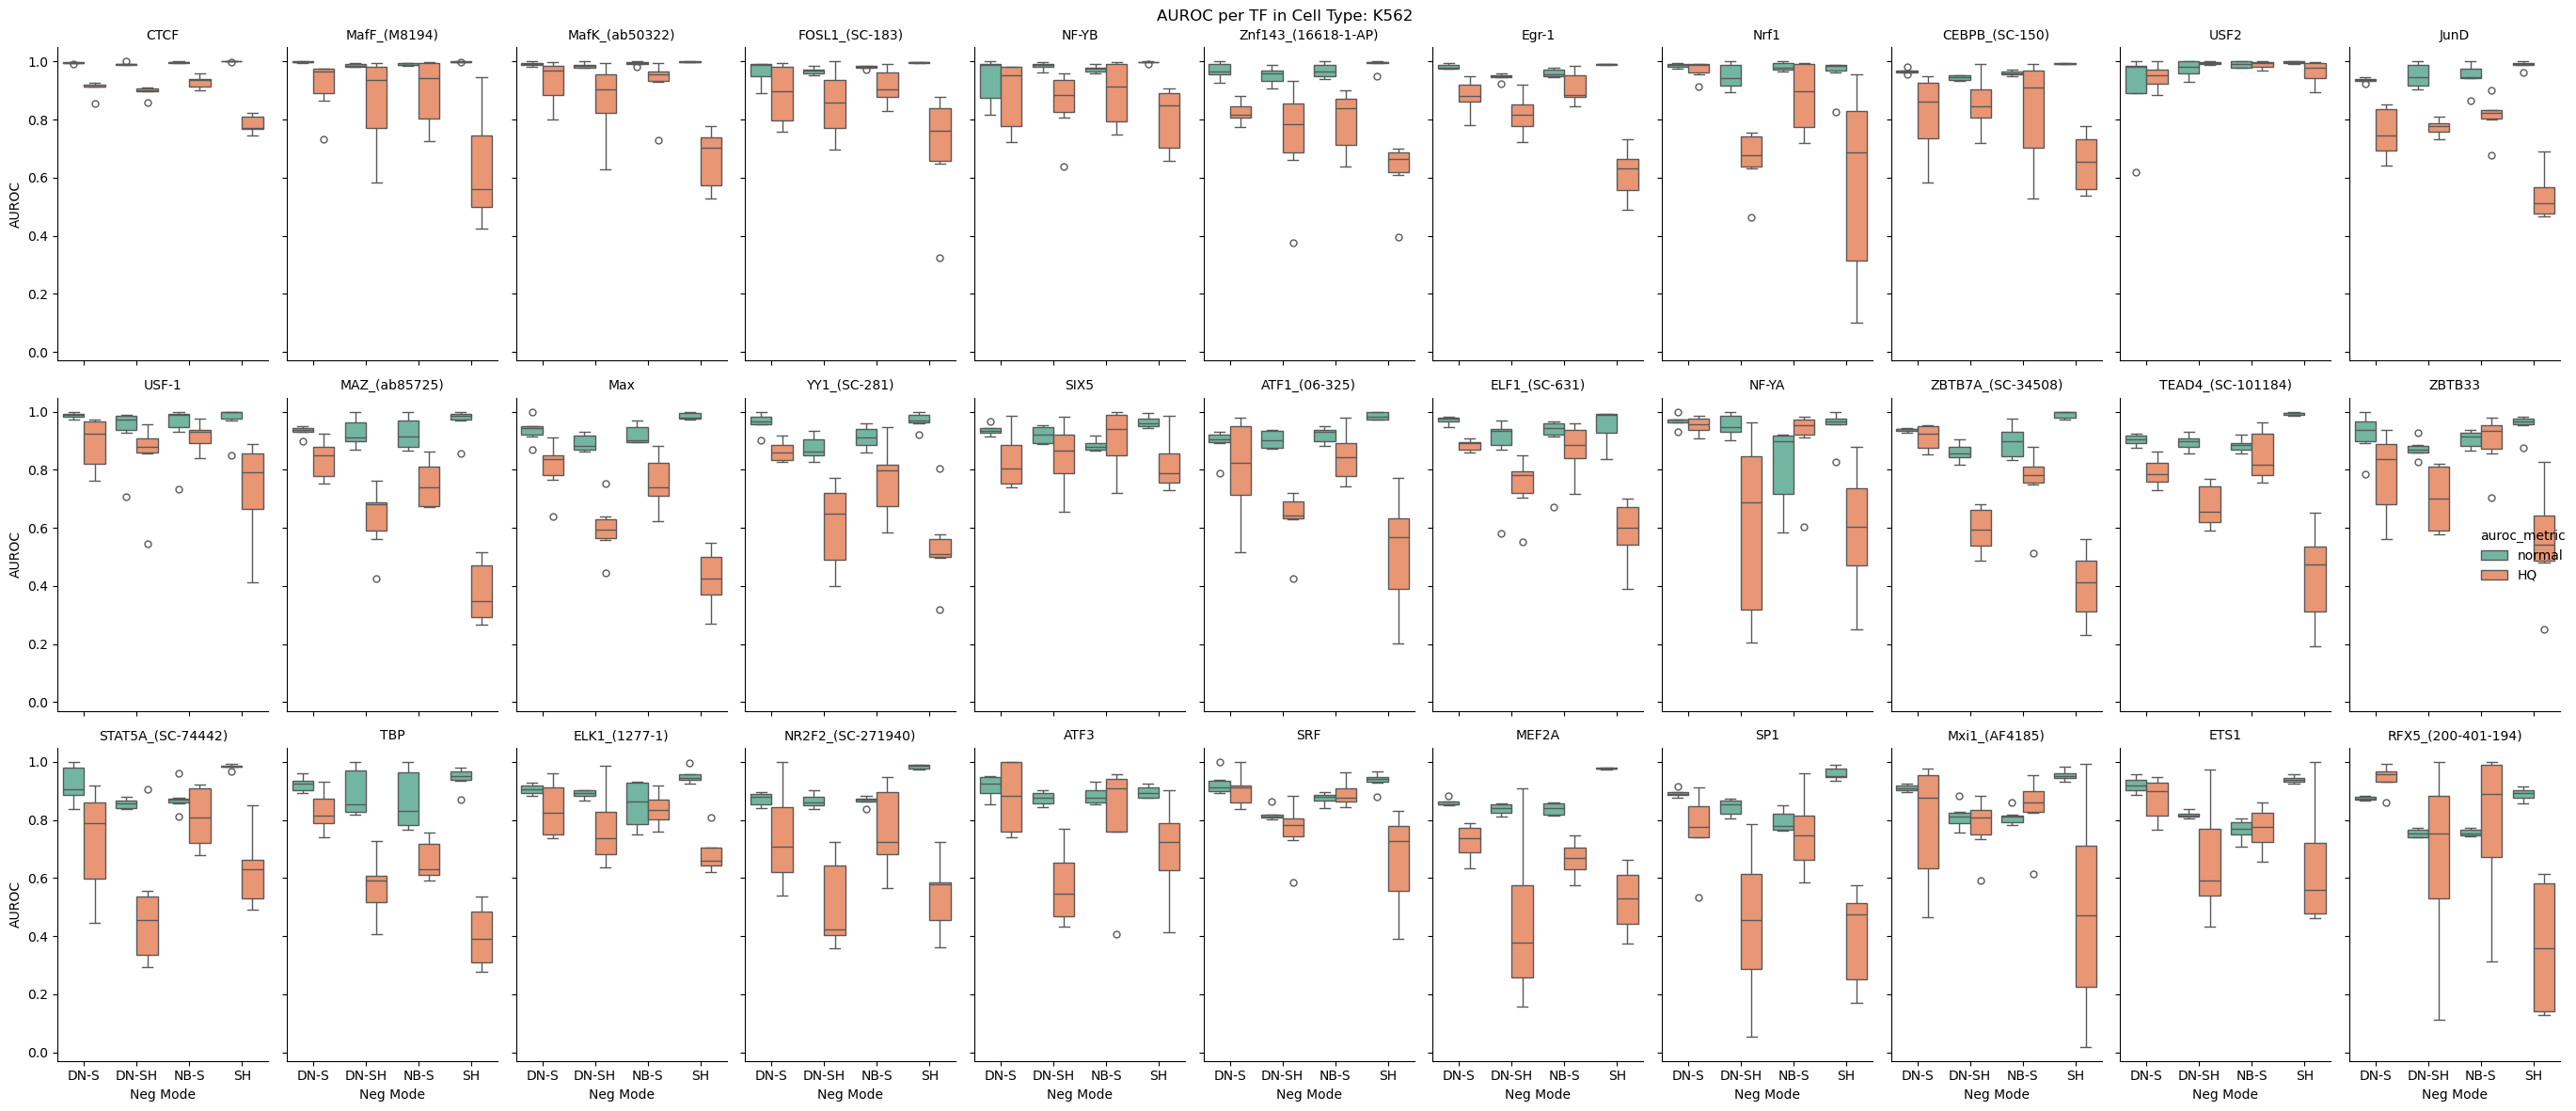

In [168]:
celltype = "K562"
# Filter the DataFrame for the current cell type
celltype_df = results_df[results_df['celltype'] == celltype]
mean_auroc_per_tf = celltype_df.groupby('TF')['AUROC'].mean().sort_values(ascending=False)
tf_order = mean_auroc_per_tf.index.tolist()

# Create a custom order for neg_sampling types
neg_sampling_order = ['dinucl_sampled', 'dinucl_shuffled', 'neighbors', 'shuffled']

# Sort the DataFrame by TF (using the custom order) and neg_sampling type
celltype_df['TF'] = pd.Categorical(celltype_df['TF'], categories=tf_order, ordered=True)
celltype_df['neg_mode'] = pd.Categorical(celltype_df['neg_mode'], categories=neg_sampling_order, ordered=True)
celltype_df = celltype_df.sort_values(['TF', 'neg_mode'])

# Create a new DataFrame with AUROC and AUROC_HQ combined into a single column
melted_df = pd.melt(
    celltype_df.sort_values(by=['TF', 'neg_mode']),
    id_vars=['TF', 'neg_mode'],
    value_vars=['AUROC', 'AUROC_HQ'],
    var_name='auroc_metric',
    value_name='AUROC_value'
)

# Map the metric names to more descriptive labels
melted_df['auroc_metric'] = melted_df['auroc_metric'].map({'AUROC': 'normal', 'AUROC_HQ': 'HQ'})

# Shorten neg_mode labels
neg_mode_labels = {
    'dinucl_sampled': 'DN-S',
    'dinucl_shuffled': 'DN-SH',
    'neighbors': 'NB-S',
    'shuffled': 'SH'
}

# Apply and order short labels
melted_df['neg_mode_short'] = melted_df['neg_mode'].map(neg_mode_labels)
neg_mode_order = ['DN-S', 'DN-SH', 'NB-S', 'SH']
melted_df['neg_mode_short'] = pd.Categorical(melted_df['neg_mode_short'], categories=neg_mode_order, ordered=True)

# Create the catplot
g = sns.catplot(
    data=melted_df,
    x='neg_mode_short',
    col='TF',
    y='AUROC_value',
    hue='auroc_metric',
    kind='box',
    col_wrap=11,
    height=4,
    aspect=0.6,
    palette='Set2'
)

# Titles and labels
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Neg Mode", "AUROC")

# Fix x-tick rotation manually
# for ax in g.axes.flatten():
#     for label in ax.get_xticklabels():
#         label.set_rotation(90)
#     ax.axhline(0.5, linestyle='--', color='red', linewidth=1)
g.fig.suptitle(f"AUROC per TF in Cell Type: {celltype}")
plt.tight_layout()
plt.show()


/tmp/ipykernel_2379175/3424626196.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  celltype_df['TF'] = pd.Categorical(celltype_df['TF'], categories=tf_order, ordered=True)
/tmp/ipykernel_2379175/3424626196.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  celltype_df['neg_mode'] = pd.Categorical(celltype_df['neg_mode'], categories=neg_sampling_order, ordered=True)


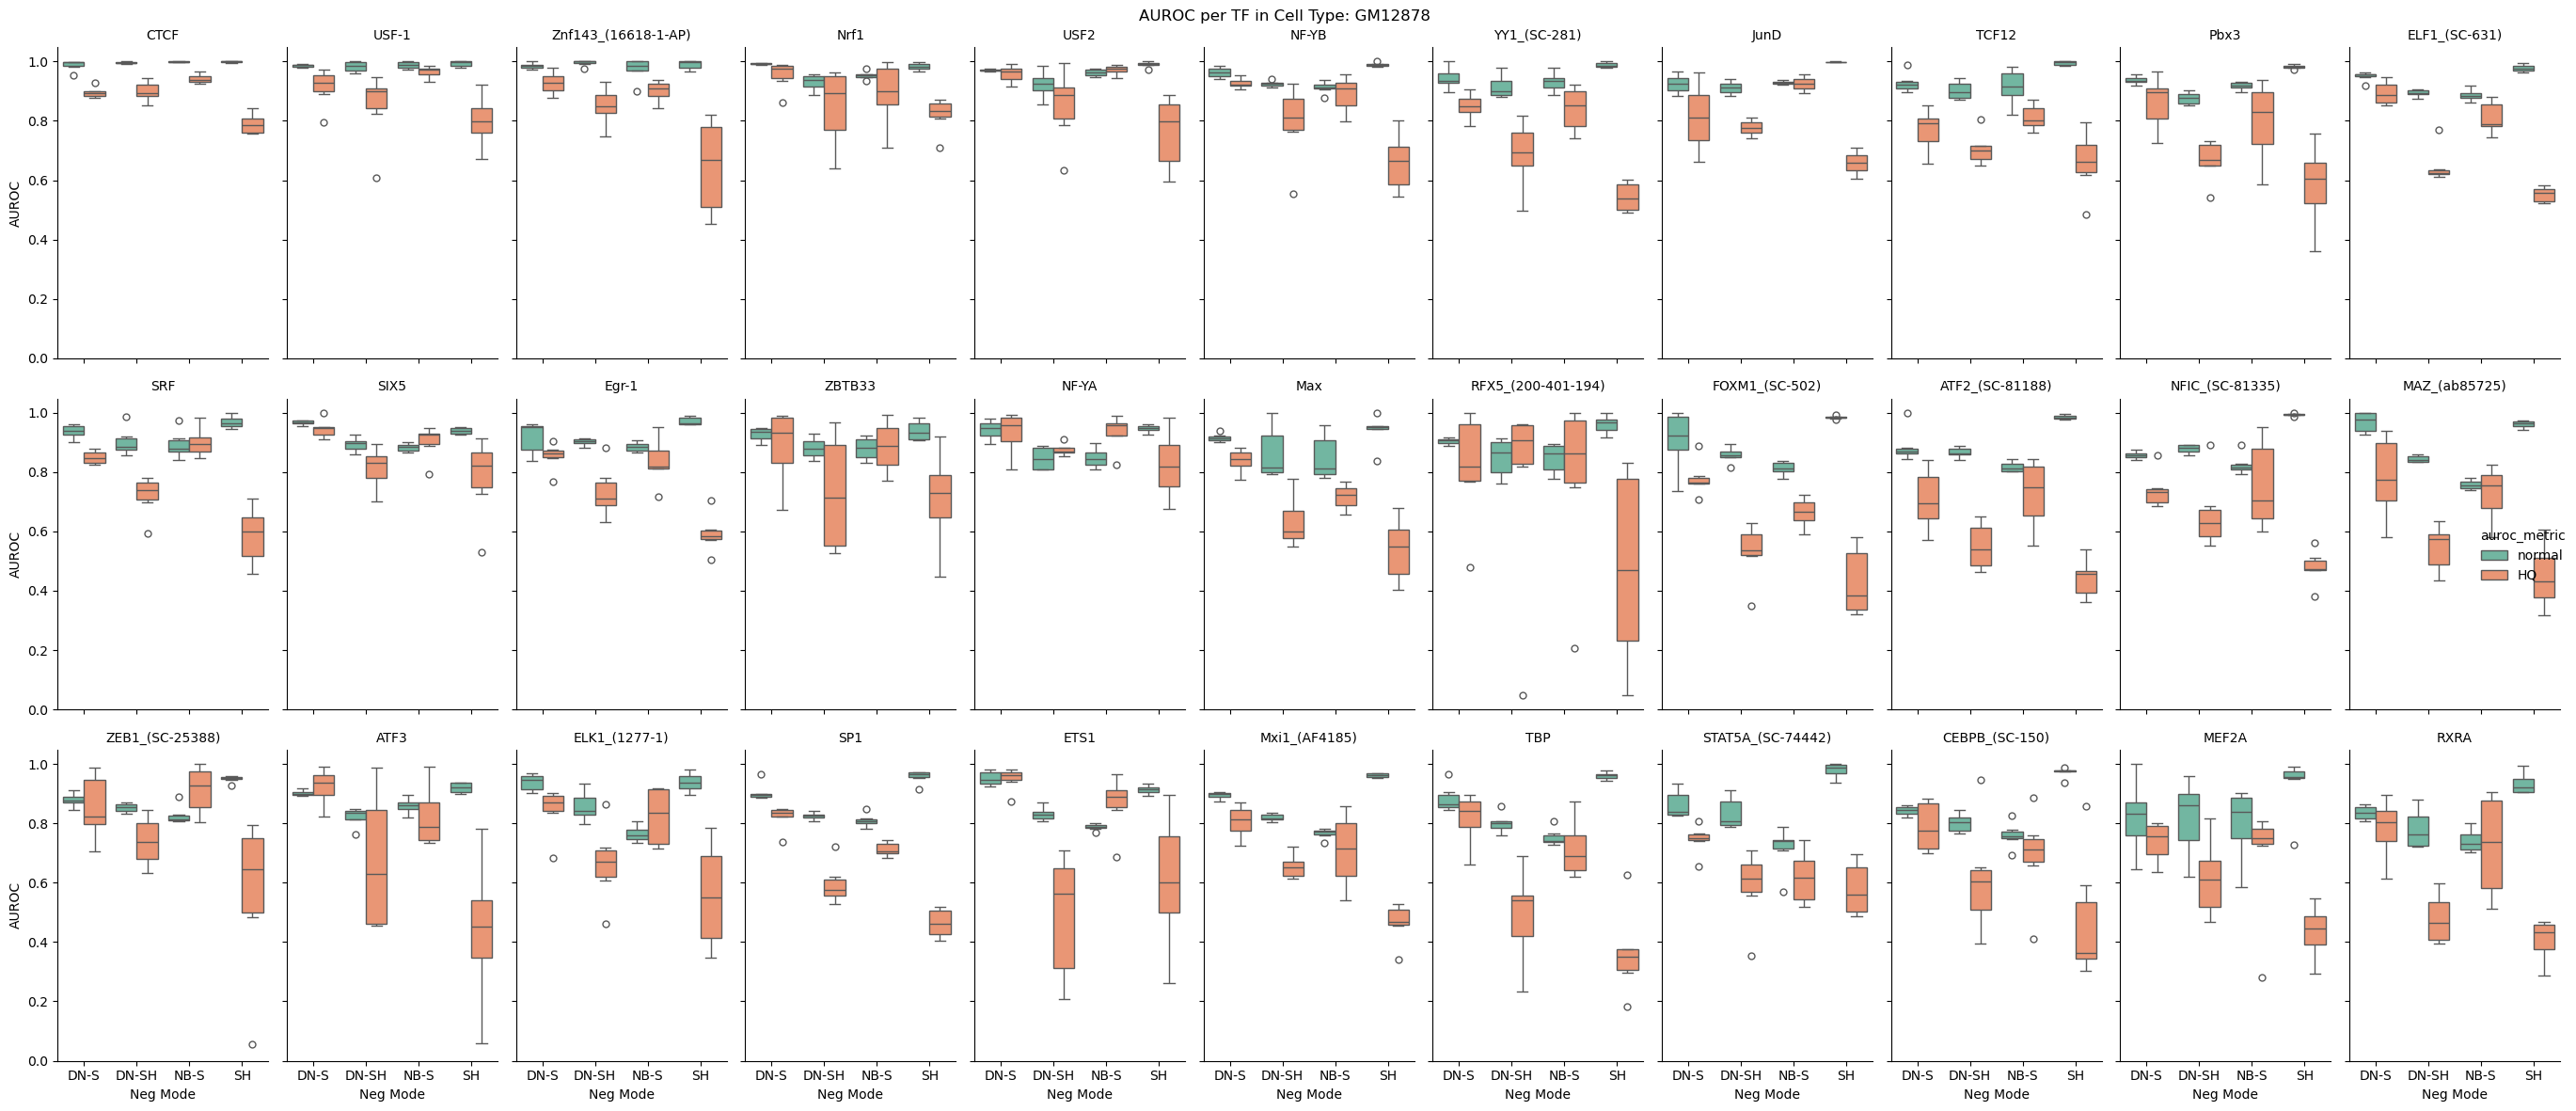

In [169]:
celltype = "GM12878"
# Filter the DataFrame for the current cell type
celltype_df = results_df[results_df['celltype'] == celltype]
mean_auroc_per_tf = celltype_df.groupby('TF')['AUROC'].mean().sort_values(ascending=False)
tf_order = mean_auroc_per_tf.index.tolist()

# Create a custom order for neg_sampling types
neg_sampling_order = ['dinucl_sampled', 'dinucl_shuffled', 'neighbors', 'shuffled']

# Sort the DataFrame by TF (using the custom order) and neg_sampling type
celltype_df['TF'] = pd.Categorical(celltype_df['TF'], categories=tf_order, ordered=True)
celltype_df['neg_mode'] = pd.Categorical(celltype_df['neg_mode'], categories=neg_sampling_order, ordered=True)
celltype_df = celltype_df.sort_values(['TF', 'neg_mode'])

# Create a new DataFrame with AUROC and AUROC_HQ combined into a single column
melted_df = pd.melt(
    celltype_df.sort_values(by=['TF', 'neg_mode']),
    id_vars=['TF', 'neg_mode'],
    value_vars=['AUROC', 'AUROC_HQ'],
    var_name='auroc_metric',
    value_name='AUROC_value'
)

# Map the metric names to more descriptive labels
melted_df['auroc_metric'] = melted_df['auroc_metric'].map({'AUROC': 'normal', 'AUROC_HQ': 'HQ'})

# Shorten neg_mode labels
neg_mode_labels = {
    'dinucl_sampled': 'DN-S',
    'dinucl_shuffled': 'DN-SH',
    'neighbors': 'NB-S',
    'shuffled': 'SH'
}

# Apply and order short labels
melted_df['neg_mode_short'] = melted_df['neg_mode'].map(neg_mode_labels)
neg_mode_order = ['DN-S', 'DN-SH', 'NB-S', 'SH']
melted_df['neg_mode_short'] = pd.Categorical(melted_df['neg_mode_short'], categories=neg_mode_order, ordered=True)

# Create the catplot
g = sns.catplot(
    data=melted_df,
    x='neg_mode_short',
    col='TF',
    y='AUROC_value',
    hue='auroc_metric',
    kind='box',
    col_wrap=11,
    height=4,
    aspect=0.6,
    palette='Set2'
)

# Titles and labels
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Neg Mode", "AUROC")

# Fix x-tick rotation manually
# for ax in g.axes.flatten():
#     for label in ax.get_xticklabels():
#         label.set_rotation(90)
#     ax.axhline(0.5, linestyle='--', color='red', linewidth=1)
g.fig.suptitle(f"AUROC per TF in Cell Type: {celltype}")
plt.tight_layout()
plt.show()

/tmp/ipykernel_2379175/4021453220.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  celltype_df['TF'] = pd.Categorical(celltype_df['TF'], categories=tf_order, ordered=True)
/tmp/ipykernel_2379175/4021453220.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  celltype_df['neg_mode'] = pd.Categorical(celltype_df['neg_mode'], categories=neg_sampling_order, ordered=True)


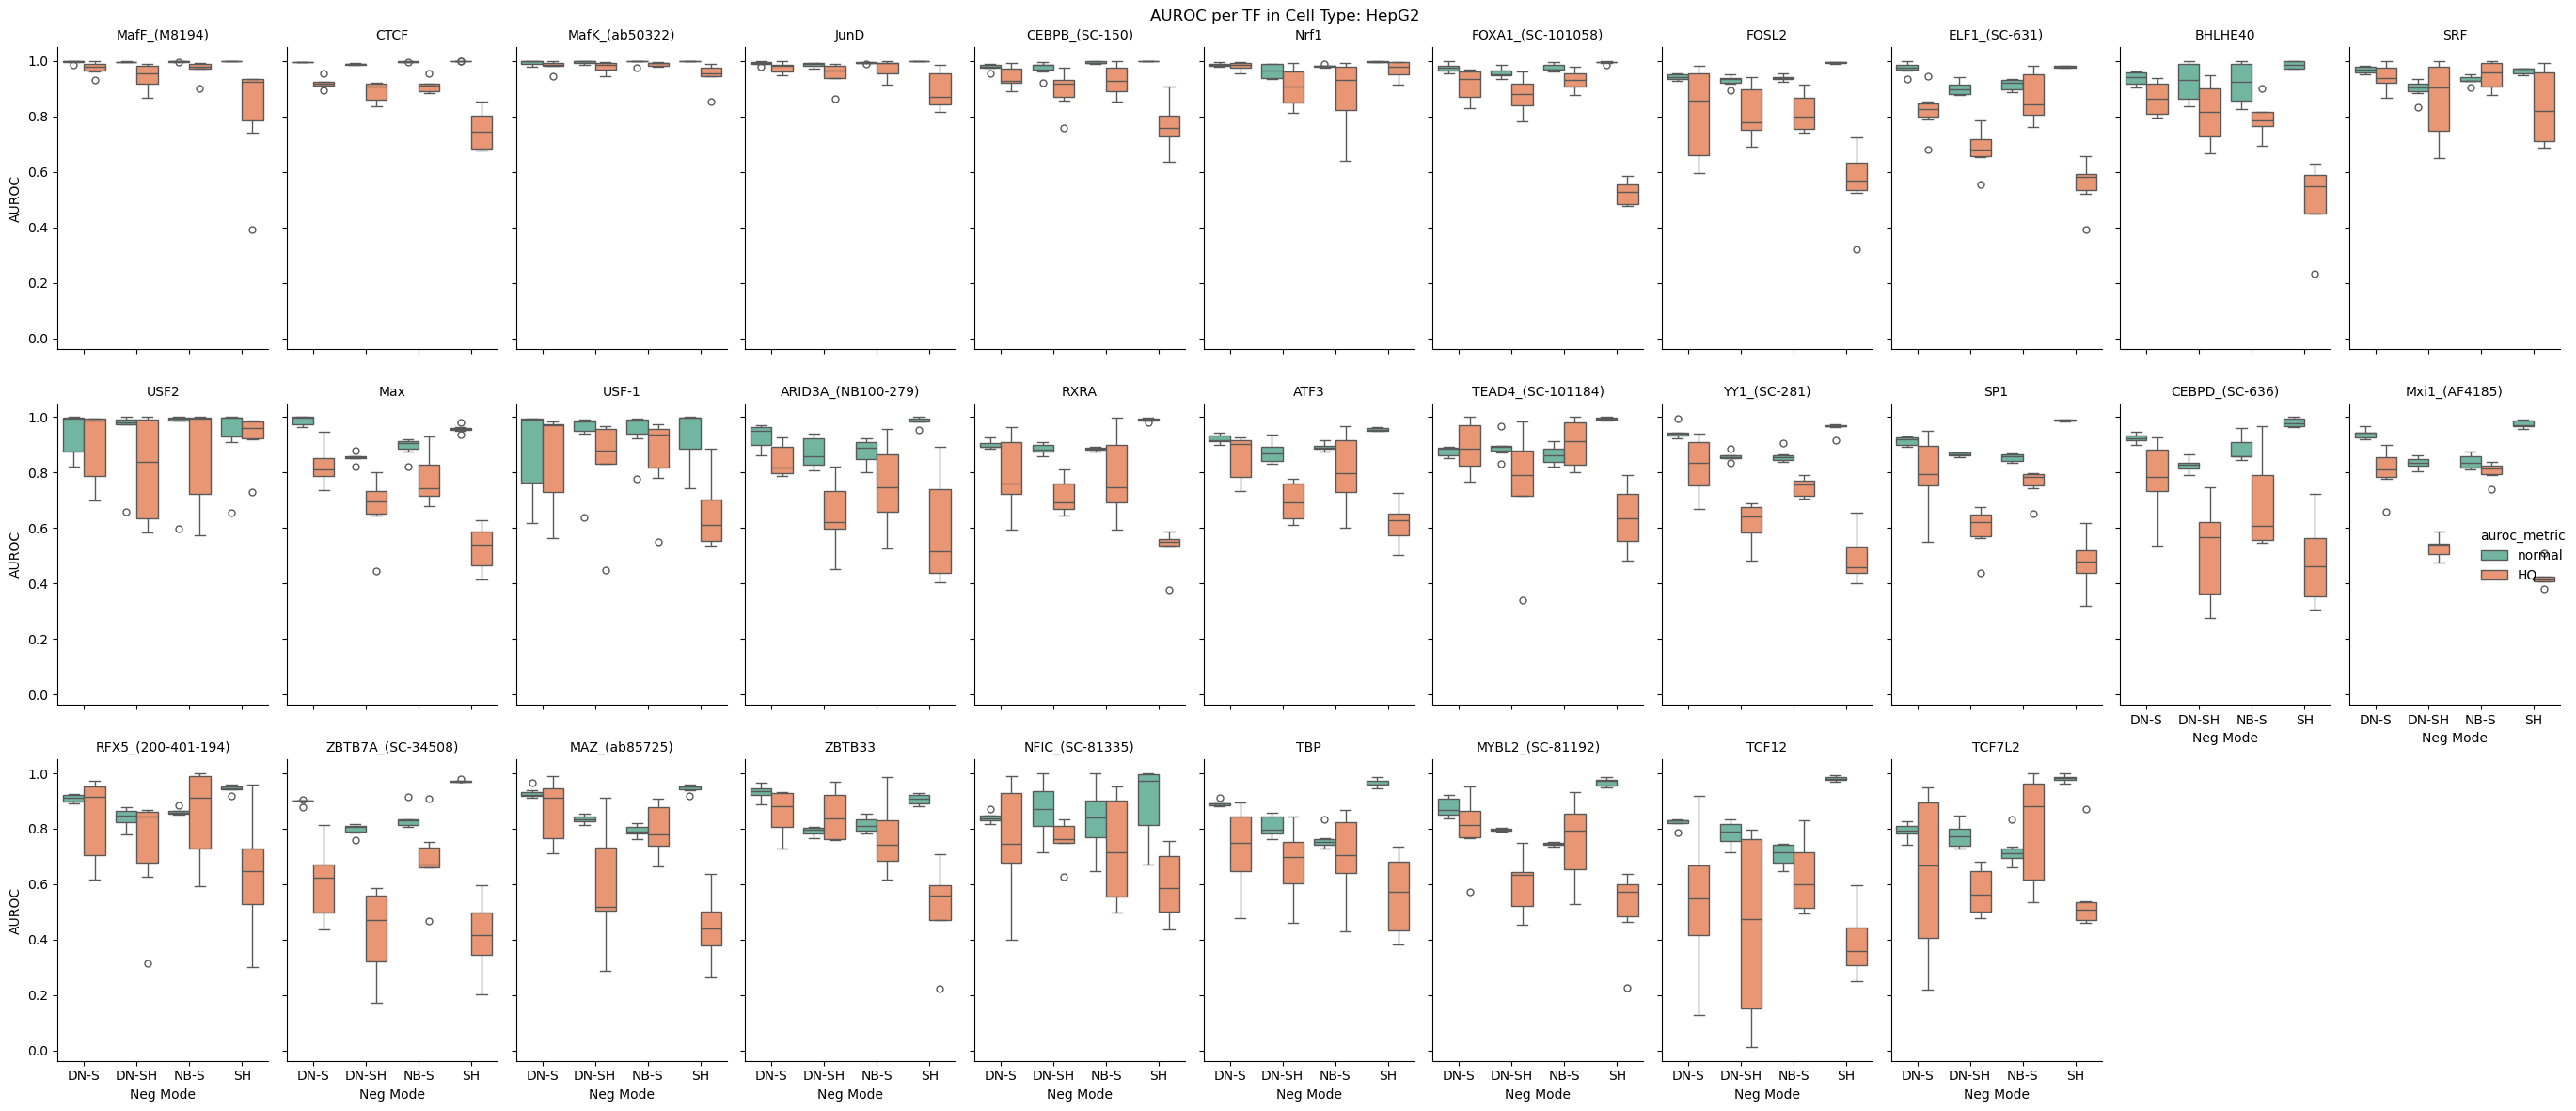

In [170]:
celltype = "HepG2"
# Filter the DataFrame for the current cell type
celltype_df = results_df[results_df['celltype'] == celltype]
mean_auroc_per_tf = celltype_df.groupby('TF')['AUROC'].mean().sort_values(ascending=False)
tf_order = mean_auroc_per_tf.index.tolist()

# Create a custom order for neg_sampling types
neg_sampling_order = ['dinucl_sampled', 'dinucl_shuffled', 'neighbors', 'shuffled']

# Sort the DataFrame by TF (using the custom order) and neg_sampling type
celltype_df['TF'] = pd.Categorical(celltype_df['TF'], categories=tf_order, ordered=True)
celltype_df['neg_mode'] = pd.Categorical(celltype_df['neg_mode'], categories=neg_sampling_order, ordered=True)
celltype_df = celltype_df.sort_values(['TF', 'neg_mode'])

# Create a new DataFrame with AUROC and AUROC_HQ combined into a single column
melted_df = pd.melt(
    celltype_df.sort_values(by=['TF', 'neg_mode']),
    id_vars=['TF', 'neg_mode'],
    value_vars=['AUROC', 'AUROC_HQ'],
    var_name='auroc_metric',
    value_name='AUROC_value'
)

# Map the metric names to more descriptive labels
melted_df['auroc_metric'] = melted_df['auroc_metric'].map({'AUROC': 'normal', 'AUROC_HQ': 'HQ'})

# Shorten neg_mode labels
neg_mode_labels = {
    'dinucl_sampled': 'DN-S',
    'dinucl_shuffled': 'DN-SH',
    'neighbors': 'NB-S',
    'shuffled': 'SH'
}

# Apply and order short labels
melted_df['neg_mode_short'] = melted_df['neg_mode'].map(neg_mode_labels)
neg_mode_order = ['DN-S', 'DN-SH', 'NB-S', 'SH']
melted_df['neg_mode_short'] = pd.Categorical(melted_df['neg_mode_short'], categories=neg_mode_order, ordered=True)

# Create the catplot
g = sns.catplot(
    data=melted_df,
    x='neg_mode_short',
    col='TF',
    y='AUROC_value',
    hue='auroc_metric',
    kind='box',
    col_wrap=11,
    height=4,
    aspect=0.6,
    palette='Set2'
)

# Titles and labels
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Neg Mode", "AUROC")

# Fix x-tick rotation manually
# for ax in g.axes.flatten():
#     for label in ax.get_xticklabels():
#         label.set_rotation(90)
#     ax.axhline(0.5, linestyle='--', color='red', linewidth=1)
g.fig.suptitle(f"AUROC per TF in Cell Type: {celltype}")
plt.tight_layout()
plt.show()

/tmp/ipykernel_2379175/3234042568.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  celltype_df['TF'] = pd.Categorical(celltype_df['TF'], categories=tf_order, ordered=True)
/tmp/ipykernel_2379175/3234042568.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  celltype_df['neg_mode'] = pd.Categorical(celltype_df['neg_mode'], categories=neg_sampling_order, ordered=True)


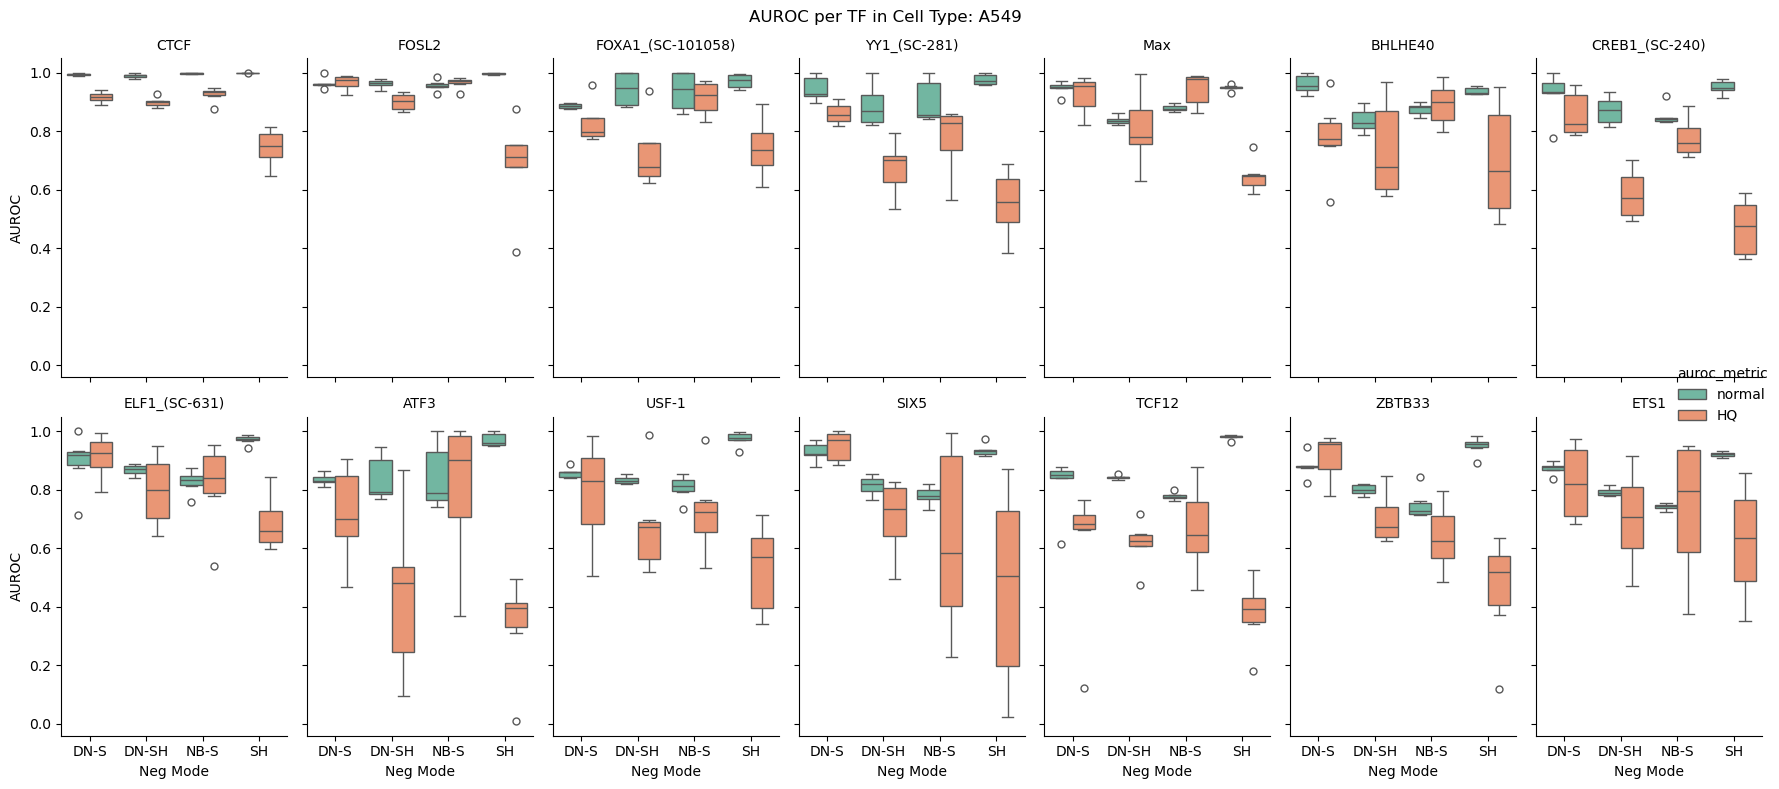

In [171]:
celltype = "A549"
# Filter the DataFrame for the current cell type
celltype_df = results_df[results_df['celltype'] == celltype]
mean_auroc_per_tf = celltype_df.groupby('TF')['AUROC'].mean().sort_values(ascending=False)
tf_order = mean_auroc_per_tf.index.tolist()

# Create a custom order for neg_sampling types
neg_sampling_order = ['dinucl_sampled', 'dinucl_shuffled', 'neighbors', 'shuffled']

# Sort the DataFrame by TF (using the custom order) and neg_sampling type
celltype_df['TF'] = pd.Categorical(celltype_df['TF'], categories=tf_order, ordered=True)
celltype_df['neg_mode'] = pd.Categorical(celltype_df['neg_mode'], categories=neg_sampling_order, ordered=True)
celltype_df = celltype_df.sort_values(['TF', 'neg_mode'])

# Create a new DataFrame with AUROC and AUROC_HQ combined into a single column
melted_df = pd.melt(
    celltype_df.sort_values(by=['TF', 'neg_mode']),
    id_vars=['TF', 'neg_mode'],
    value_vars=['AUROC', 'AUROC_HQ'],
    var_name='auroc_metric',
    value_name='AUROC_value'
)

# Map the metric names to more descriptive labels
melted_df['auroc_metric'] = melted_df['auroc_metric'].map({'AUROC': 'normal', 'AUROC_HQ': 'HQ'})

# Shorten neg_mode labels
neg_mode_labels = {
    'dinucl_sampled': 'DN-S',
    'dinucl_shuffled': 'DN-SH',
    'neighbors': 'NB-S',
    'shuffled': 'SH'
}

# Apply and order short labels
melted_df['neg_mode_short'] = melted_df['neg_mode'].map(neg_mode_labels)
neg_mode_order = ['DN-S', 'DN-SH', 'NB-S', 'SH']
melted_df['neg_mode_short'] = pd.Categorical(melted_df['neg_mode_short'], categories=neg_mode_order, ordered=True)

# Create the catplot
g = sns.catplot(
    data=melted_df,
    x='neg_mode_short',
    col='TF',
    y='AUROC_value',
    hue='auroc_metric',
    kind='box',
    col_wrap=7,
    height=4,
    aspect=0.6,
    palette='Set2'
)

# Titles and labels
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Neg Mode", "AUROC")

# Fix x-tick rotation manually
# for ax in g.axes.flatten():
#     for label in ax.get_xticklabels():
#         label.set_rotation(90)
#     ax.axhline(0.5, linestyle='--', color='red', linewidth=1)
g.fig.suptitle(f"AUROC per TF in Cell Type: {celltype}")
plt.tight_layout()
plt.show()

/tmp/ipykernel_2379175/1737181975.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  celltype_df['TF'] = pd.Categorical(celltype_df['TF'], categories=tf_order, ordered=True)
/tmp/ipykernel_2379175/1737181975.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  celltype_df['neg_mode'] = pd.Categorical(celltype_df['neg_mode'], categories=neg_sampling_order, ordered=True)


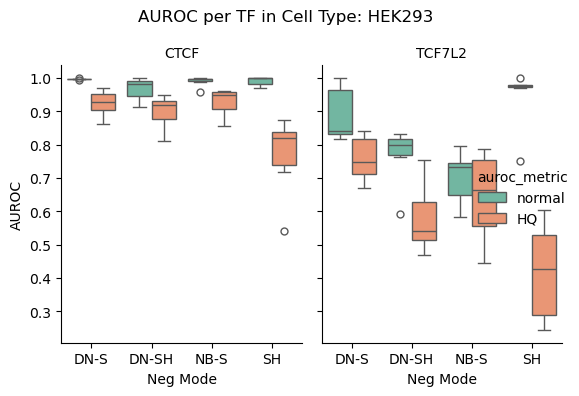

In [172]:
celltype = "HEK293"
# Filter the DataFrame for the current cell type
celltype_df = results_df[results_df['celltype'] == celltype]
mean_auroc_per_tf = celltype_df.groupby('TF')['AUROC'].mean().sort_values(ascending=False)
tf_order = mean_auroc_per_tf.index.tolist()

# Create a custom order for neg_sampling types
neg_sampling_order = ['dinucl_sampled', 'dinucl_shuffled', 'neighbors', 'shuffled']

# Sort the DataFrame by TF (using the custom order) and neg_sampling type
celltype_df['TF'] = pd.Categorical(celltype_df['TF'], categories=tf_order, ordered=True)
celltype_df['neg_mode'] = pd.Categorical(celltype_df['neg_mode'], categories=neg_sampling_order, ordered=True)
celltype_df = celltype_df.sort_values(['TF', 'neg_mode'])

# Create a new DataFrame with AUROC and AUROC_HQ combined into a single column
melted_df = pd.melt(
    celltype_df.sort_values(by=['TF', 'neg_mode']),
    id_vars=['TF', 'neg_mode'],
    value_vars=['AUROC', 'AUROC_HQ'],
    var_name='auroc_metric',
    value_name='AUROC_value'
)

# Map the metric names to more descriptive labels
melted_df['auroc_metric'] = melted_df['auroc_metric'].map({'AUROC': 'normal', 'AUROC_HQ': 'HQ'})

# Shorten neg_mode labels
neg_mode_labels = {
    'dinucl_sampled': 'DN-S',
    'dinucl_shuffled': 'DN-SH',
    'neighbors': 'NB-S',
    'shuffled': 'SH'
}

# Apply and order short labels
melted_df['neg_mode_short'] = melted_df['neg_mode'].map(neg_mode_labels)
neg_mode_order = ['DN-S', 'DN-SH', 'NB-S', 'SH']
melted_df['neg_mode_short'] = pd.Categorical(melted_df['neg_mode_short'], categories=neg_mode_order, ordered=True)

# Create the catplot
g = sns.catplot(
    data=melted_df,
    x='neg_mode_short',
    col='TF',
    y='AUROC_value',
    hue='auroc_metric',
    kind='box',
    height=4,
    aspect=0.6,
    palette='Set2'
)

# Titles and labels
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Neg Mode", "AUROC")

# Fix x-tick rotation manually
# for ax in g.axes.flatten():
#     for label in ax.get_xticklabels():
#         label.set_rotation(90)
#     ax.axhline(0.5, linestyle='--', color='red', linewidth=1)
g.fig.suptitle(f"AUROC per TF in Cell Type: {celltype}")
plt.tight_layout()
plt.show()

/tmp/ipykernel_2379175/1753405897.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  celltype_df['TF'] = pd.Categorical(celltype_df['TF'], categories=tf_order, ordered=True)
/tmp/ipykernel_2379175/1753405897.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  celltype_df['neg_mode'] = pd.Categorical(celltype_df['neg_mode'], categories=neg_sampling_order, ordered=True)


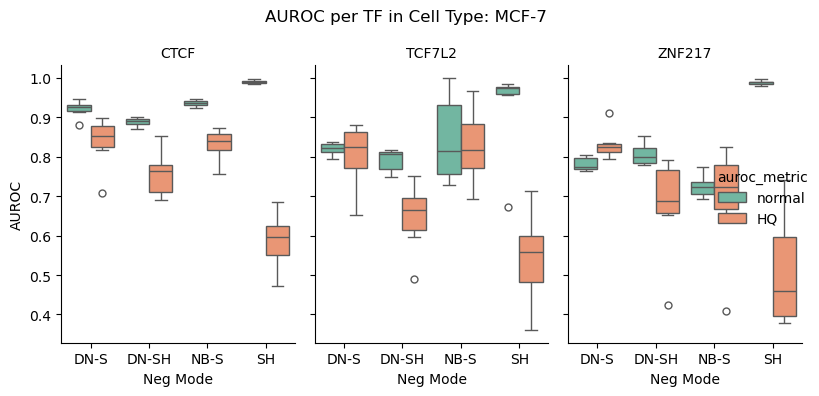

In [173]:
celltype = "MCF-7"
# Filter the DataFrame for the current cell type
celltype_df = results_df[results_df['celltype'] == celltype]
mean_auroc_per_tf = celltype_df.groupby('TF')['AUROC'].mean().sort_values(ascending=False)
tf_order = mean_auroc_per_tf.index.tolist()

# Create a custom order for neg_sampling types
neg_sampling_order = ['dinucl_sampled', 'dinucl_shuffled', 'neighbors', 'shuffled']

# Sort the DataFrame by TF (using the custom order) and neg_sampling type
celltype_df['TF'] = pd.Categorical(celltype_df['TF'], categories=tf_order, ordered=True)
celltype_df['neg_mode'] = pd.Categorical(celltype_df['neg_mode'], categories=neg_sampling_order, ordered=True)
celltype_df = celltype_df.sort_values(['TF', 'neg_mode'])

# Create a new DataFrame with AUROC and AUROC_HQ combined into a single column
melted_df = pd.melt(
    celltype_df.sort_values(by=['TF', 'neg_mode']),
    id_vars=['TF', 'neg_mode'],
    value_vars=['AUROC', 'AUROC_HQ'],
    var_name='auroc_metric',
    value_name='AUROC_value'
)

# Map the metric names to more descriptive labels
melted_df['auroc_metric'] = melted_df['auroc_metric'].map({'AUROC': 'normal', 'AUROC_HQ': 'HQ'})

# Shorten neg_mode labels
neg_mode_labels = {
    'dinucl_sampled': 'DN-S',
    'dinucl_shuffled': 'DN-SH',
    'neighbors': 'NB-S',
    'shuffled': 'SH'
}

# Apply and order short labels
melted_df['neg_mode_short'] = melted_df['neg_mode'].map(neg_mode_labels)
neg_mode_order = ['DN-S', 'DN-SH', 'NB-S', 'SH']
melted_df['neg_mode_short'] = pd.Categorical(melted_df['neg_mode_short'], categories=neg_mode_order, ordered=True)

# Create the catplot
g = sns.catplot(
    data=melted_df,
    x='neg_mode_short',
    col='TF',
    y='AUROC_value',
    hue='auroc_metric',
    kind='box',
    height=4,
    aspect=0.6,
    palette='Set2'
)

# Titles and labels
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Neg Mode", "AUROC")

# Fix x-tick rotation manually
# for ax in g.axes.flatten():
#     for label in ax.get_xticklabels():
#         label.set_rotation(90)
#     ax.axhline(0.5, linestyle='--', color='red', linewidth=1)
g.fig.suptitle(f"AUROC per TF in Cell Type: {celltype}")
plt.tight_layout()
plt.show()

In [174]:
results_df["AUROC_delta"] = results_df["AUROC"] - results_df["AUROC_HQ"]

/tmp/ipykernel_2379175/1670567998.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  celltype_df['TF'] = pd.Categorical(celltype_df['TF'], categories=tf_order, ordered=True)
/tmp/ipykernel_2379175/1670567998.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  celltype_df['neg_mode'] = pd.Categorical(celltype_df['neg_mode'], categories=neg_sampling_order, ordered=True)


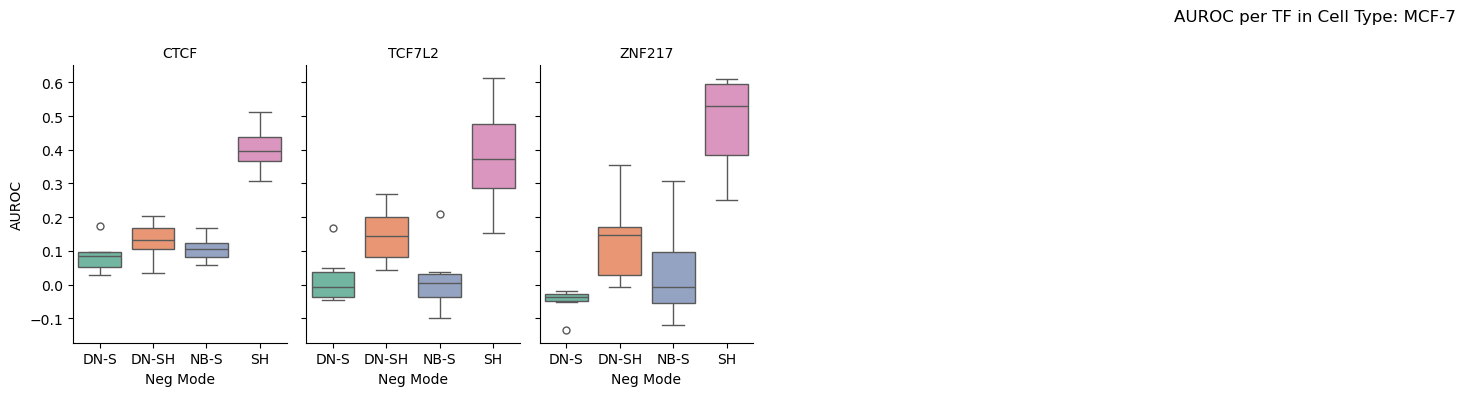

/tmp/ipykernel_2379175/1670567998.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  celltype_df['TF'] = pd.Categorical(celltype_df['TF'], categories=tf_order, ordered=True)
/tmp/ipykernel_2379175/1670567998.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  celltype_df['neg_mode'] = pd.Categorical(celltype_df['neg_mode'], categories=neg_sampling_order, ordered=True)


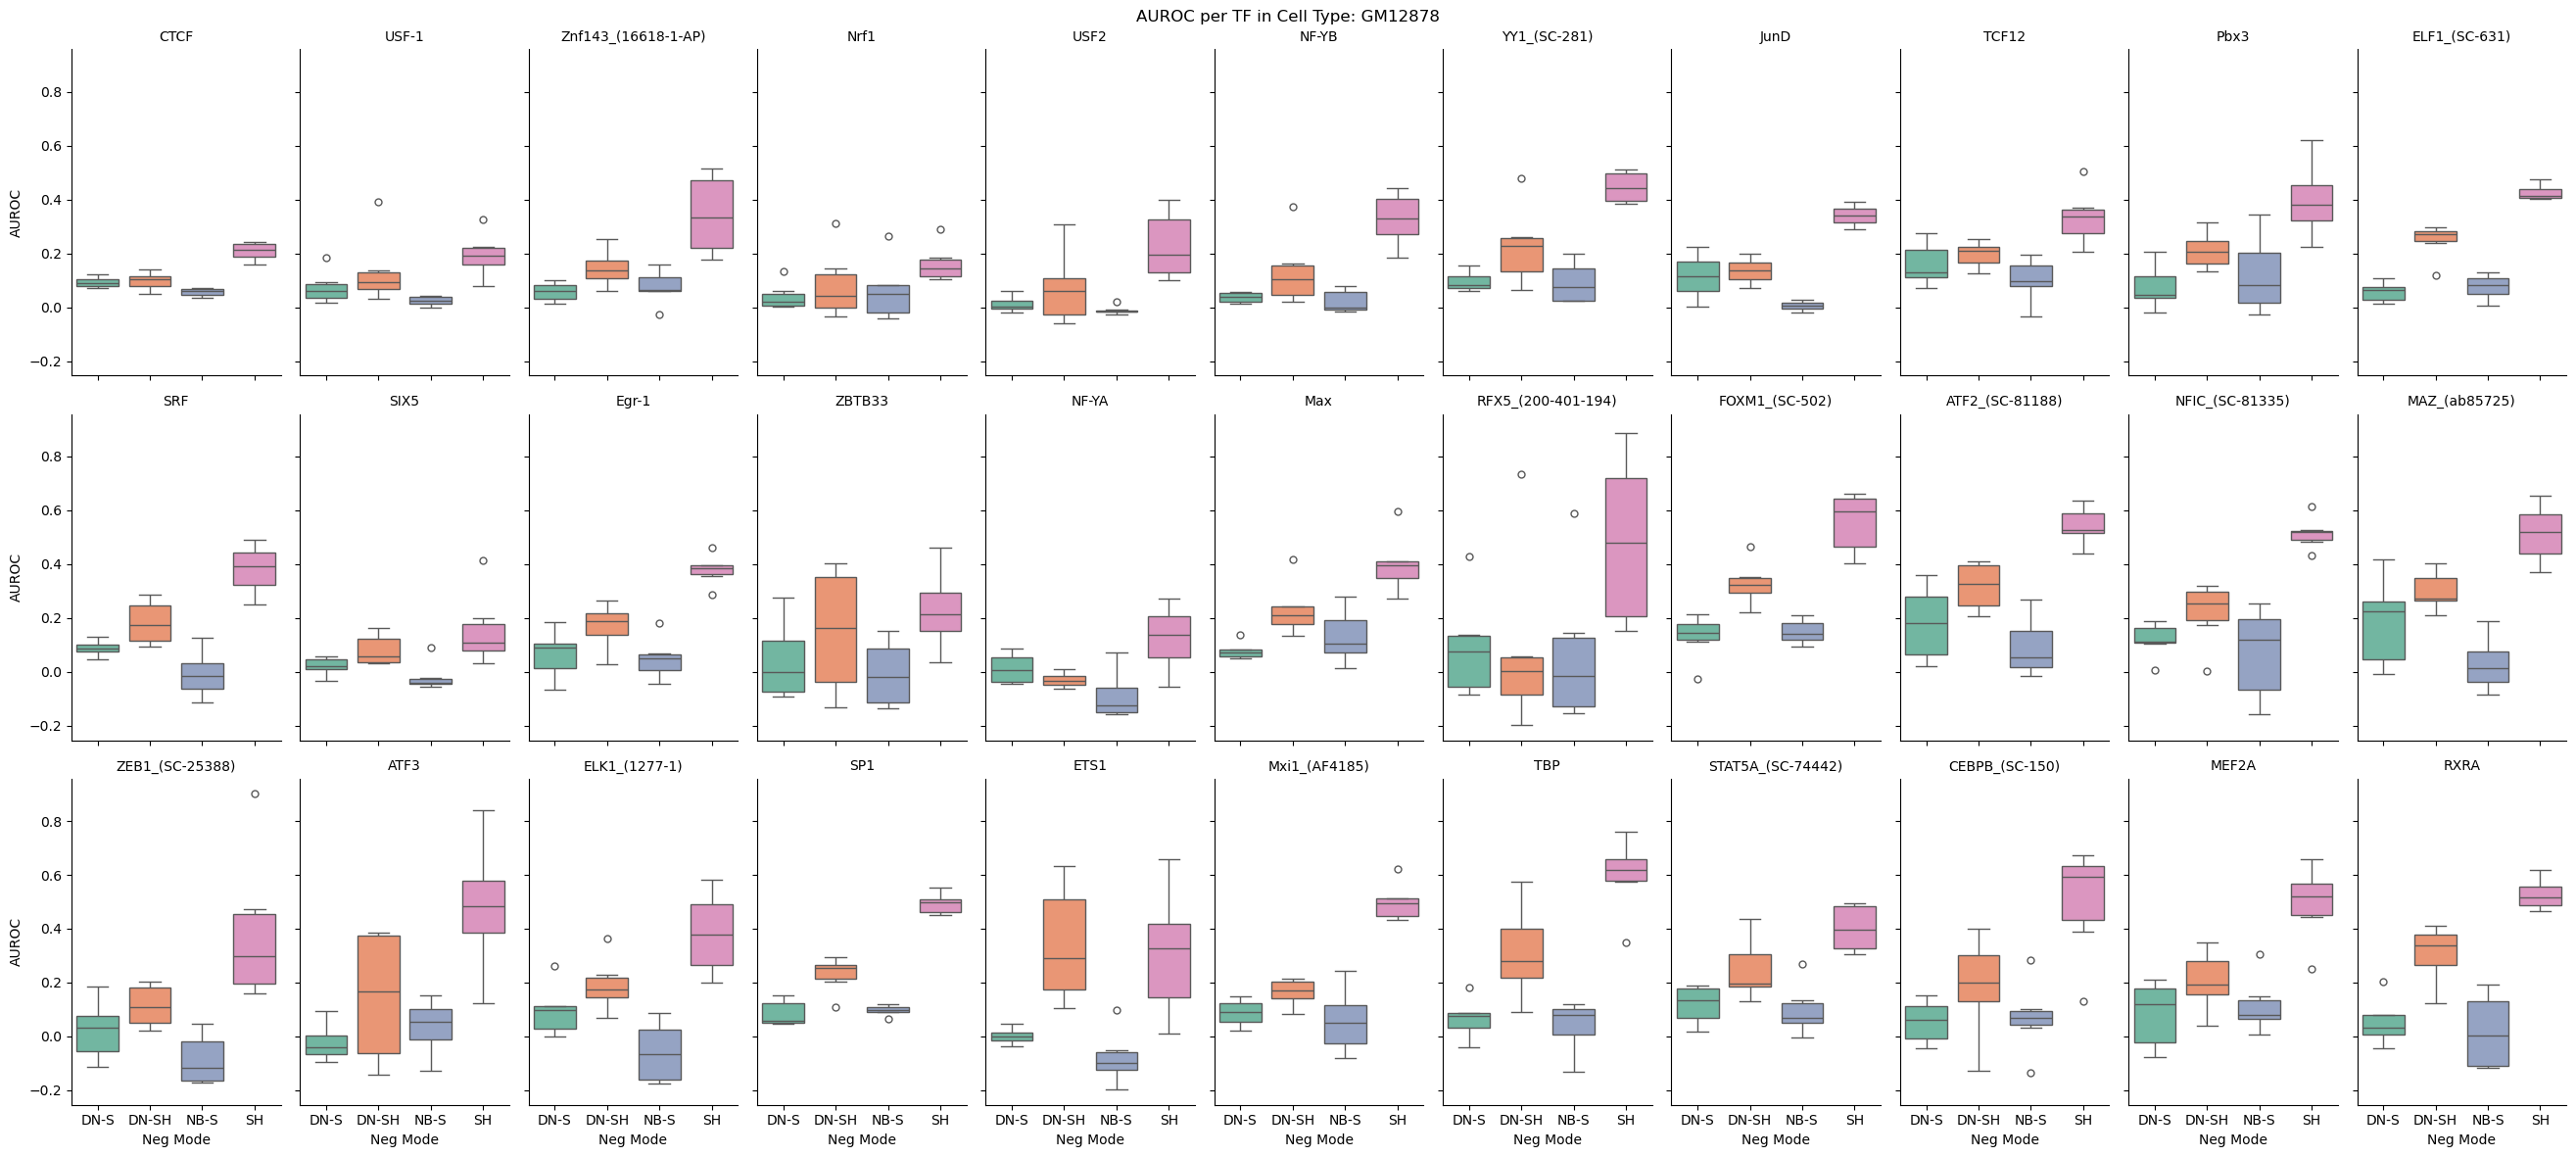

/tmp/ipykernel_2379175/1670567998.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  celltype_df['TF'] = pd.Categorical(celltype_df['TF'], categories=tf_order, ordered=True)
/tmp/ipykernel_2379175/1670567998.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  celltype_df['neg_mode'] = pd.Categorical(celltype_df['neg_mode'], categories=neg_sampling_order, ordered=True)


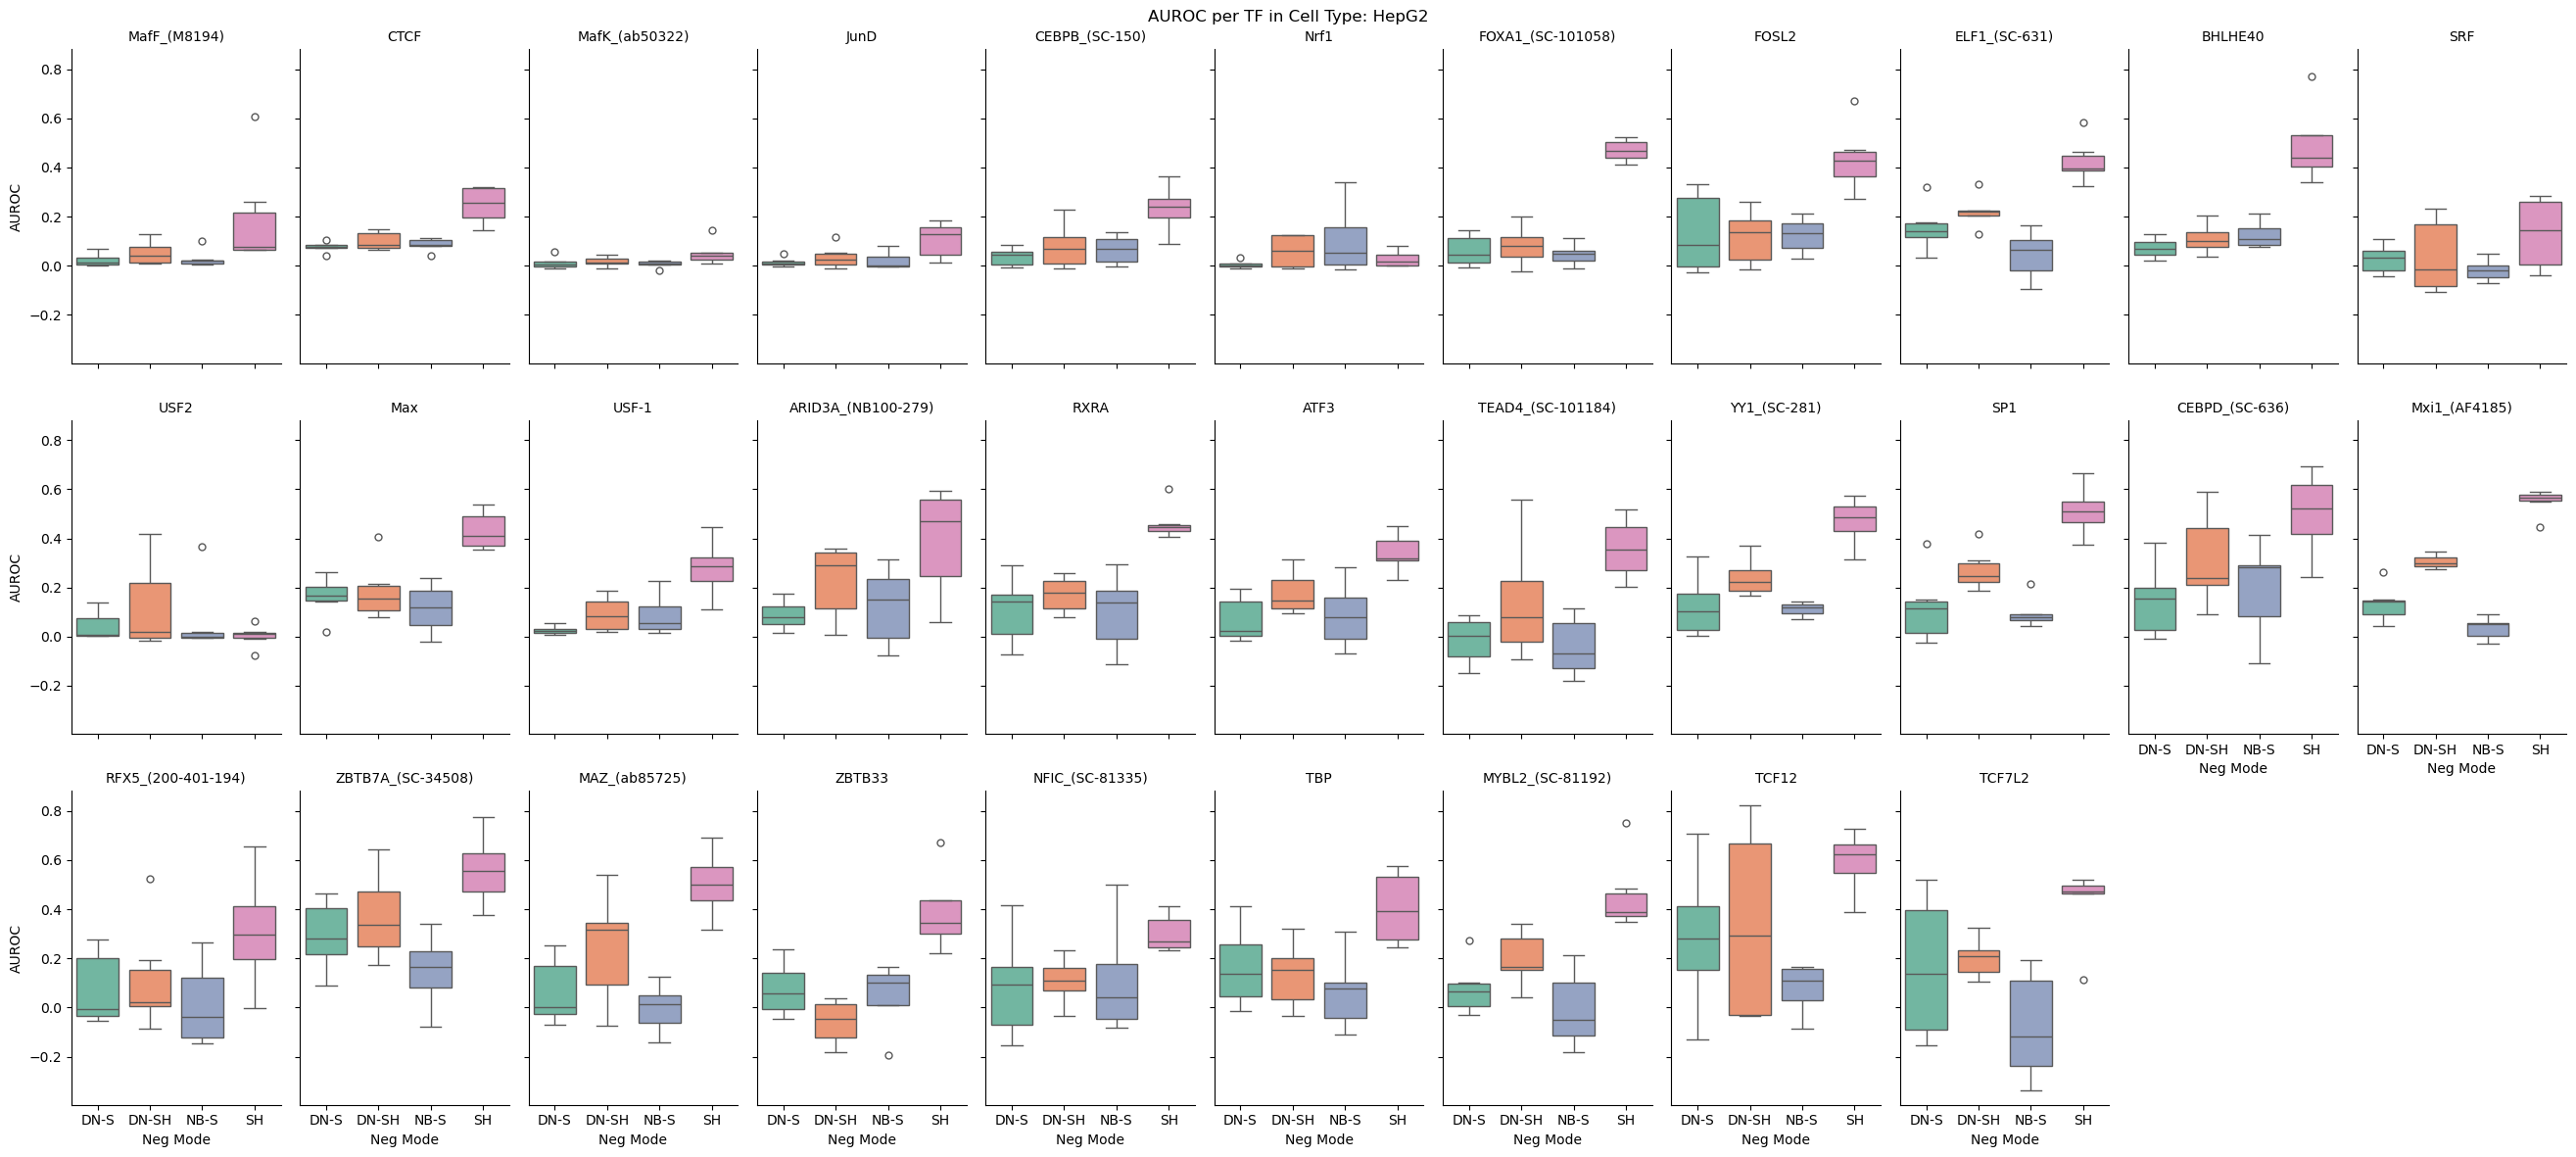

/tmp/ipykernel_2379175/1670567998.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  celltype_df['TF'] = pd.Categorical(celltype_df['TF'], categories=tf_order, ordered=True)
/tmp/ipykernel_2379175/1670567998.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  celltype_df['neg_mode'] = pd.Categorical(celltype_df['neg_mode'], categories=neg_sampling_order, ordered=True)


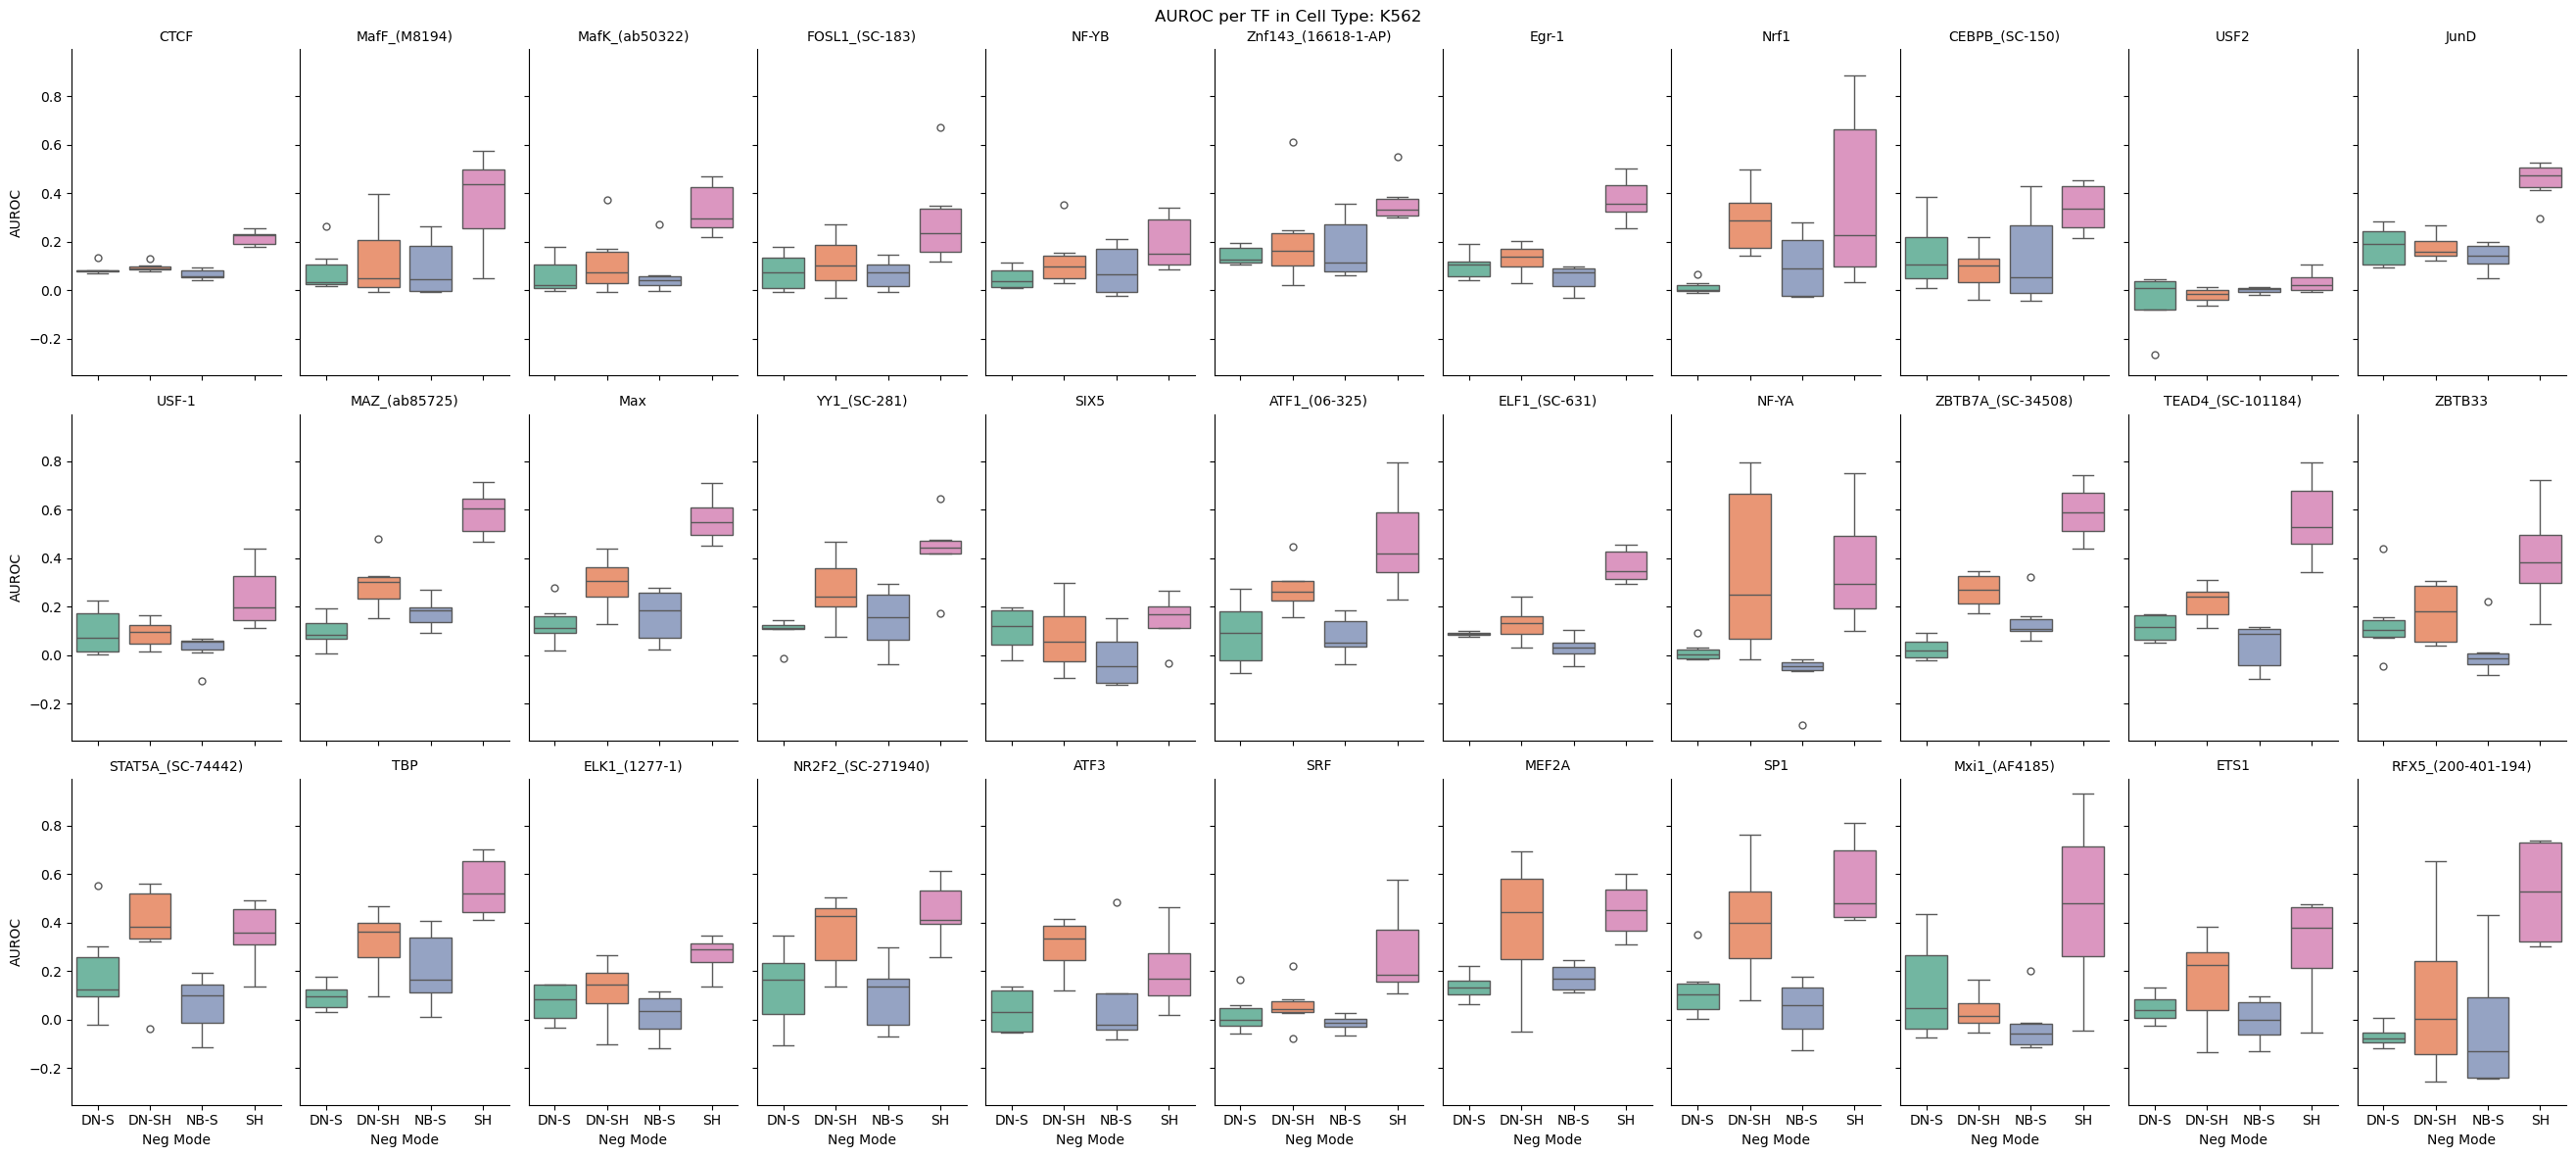

/tmp/ipykernel_2379175/1670567998.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  celltype_df['TF'] = pd.Categorical(celltype_df['TF'], categories=tf_order, ordered=True)
/tmp/ipykernel_2379175/1670567998.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  celltype_df['neg_mode'] = pd.Categorical(celltype_df['neg_mode'], categories=neg_sampling_order, ordered=True)


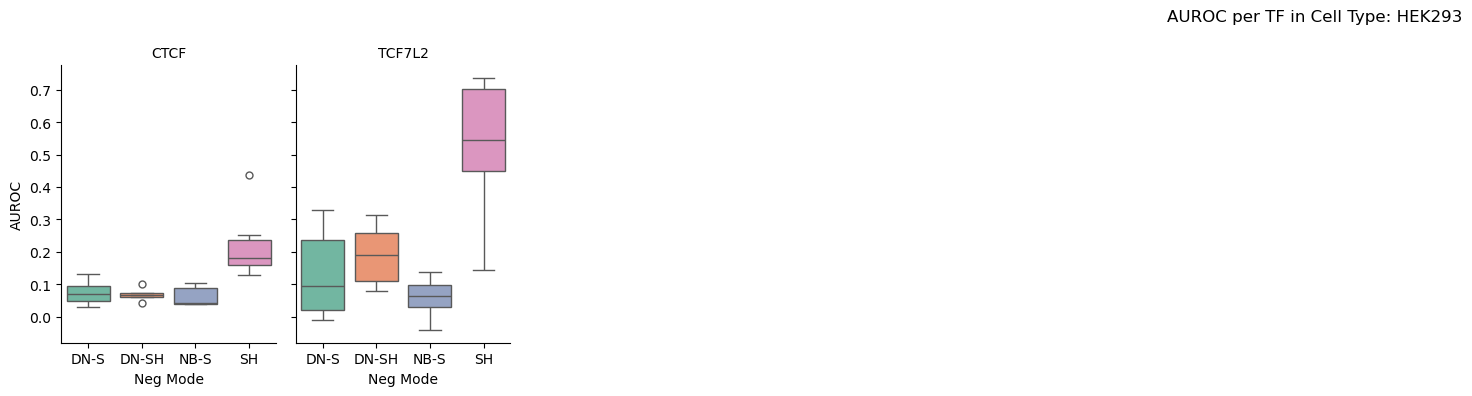

/tmp/ipykernel_2379175/1670567998.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  celltype_df['TF'] = pd.Categorical(celltype_df['TF'], categories=tf_order, ordered=True)
/tmp/ipykernel_2379175/1670567998.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  celltype_df['neg_mode'] = pd.Categorical(celltype_df['neg_mode'], categories=neg_sampling_order, ordered=True)


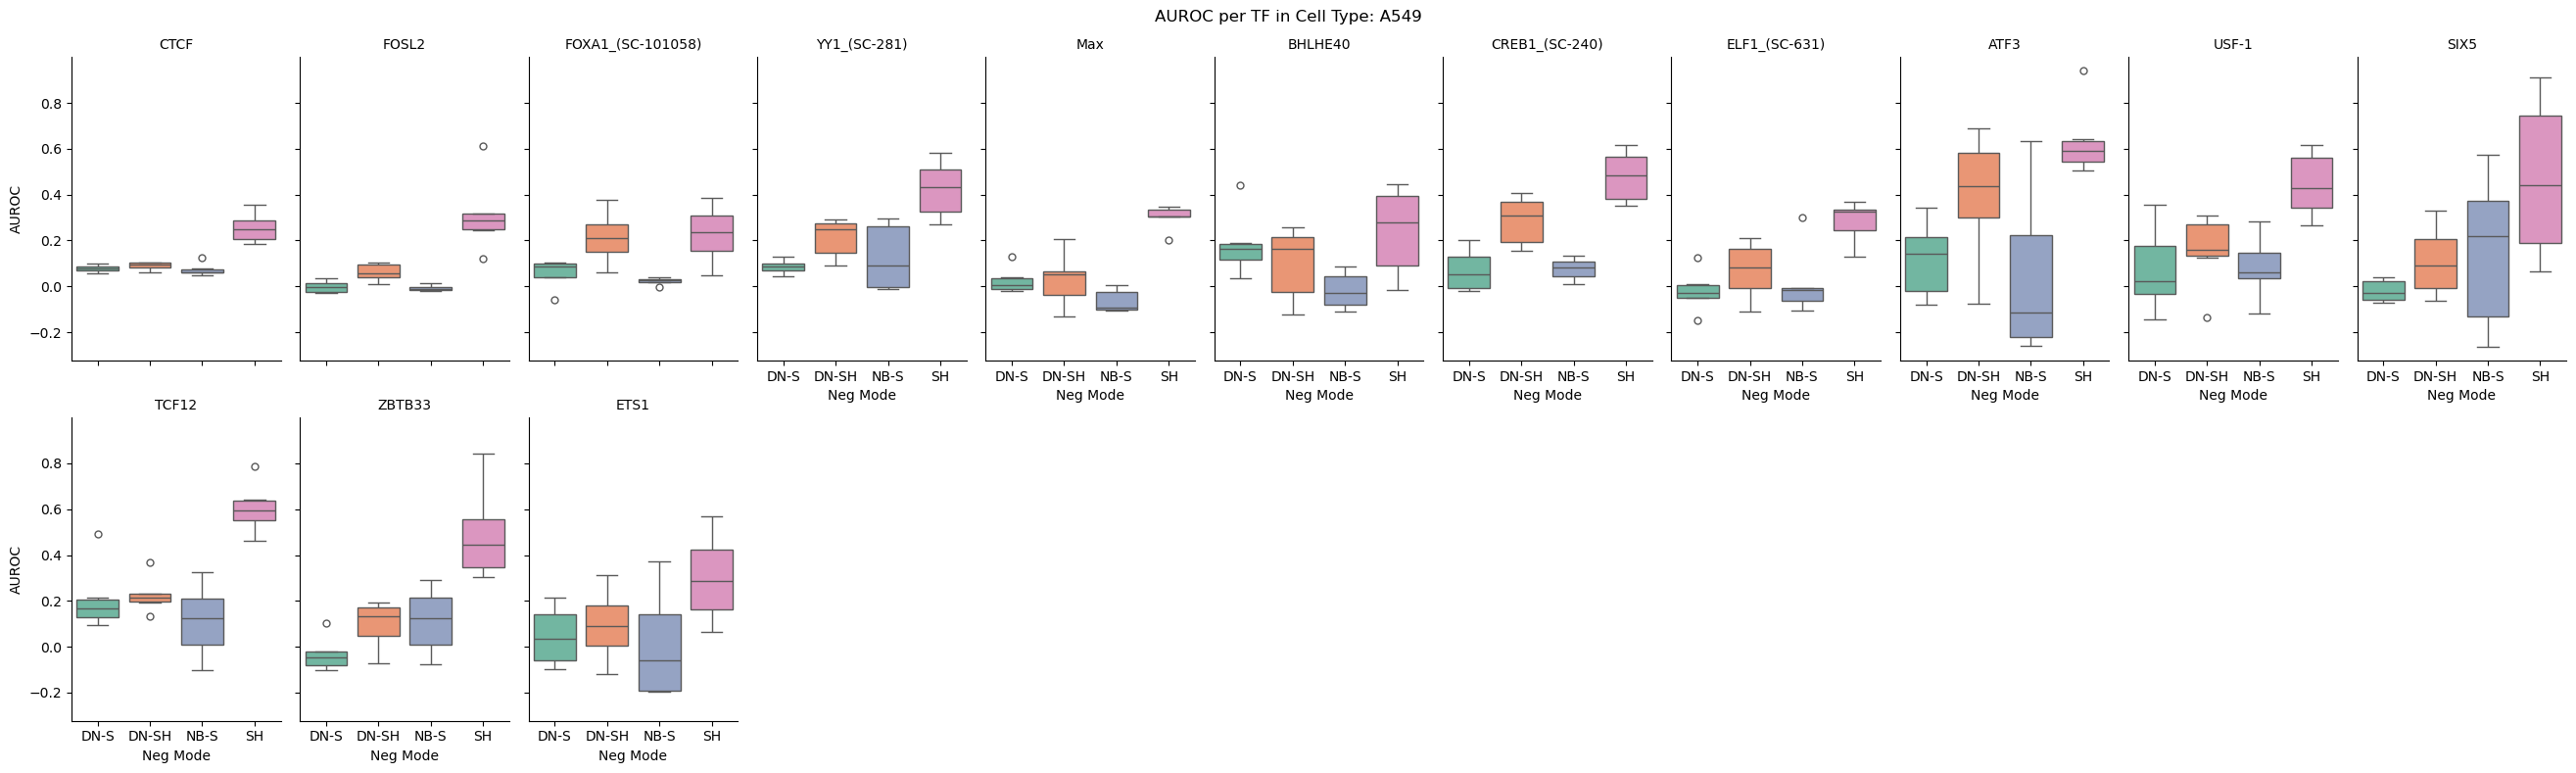

In [175]:
# WRONG FIGURES! STILL NEED TO FIX THEM
import matplotlib.pyplot as plt
import seaborn as sns
for celltype in unique_celltypes:
    # Filter the DataFrame for the current cell type
    celltype_df = results_df[results_df['celltype'] == celltype]
    mean_auroc_per_tf = celltype_df.groupby('TF')['AUROC'].mean().sort_values(ascending=False)
    tf_order = mean_auroc_per_tf.index.tolist()

    # Create a custom order for neg_sampling types
    neg_sampling_order = ['dinucl_sampled', 'dinucl_shuffled', 'neighbors', 'shuffled']

    # Sort the DataFrame by TF (using the custom order) and neg_sampling type
    celltype_df['TF'] = pd.Categorical(celltype_df['TF'], categories=tf_order, ordered=True)
    celltype_df['neg_mode'] = pd.Categorical(celltype_df['neg_mode'], categories=neg_sampling_order, ordered=True)
    celltype_df = celltype_df.sort_values(['TF', 'neg_mode'])


    # Shorten neg_mode labels
    neg_mode_labels = {
        'dinucl_sampled': 'DN-S',
        'dinucl_shuffled': 'DN-SH',
        'neighbors': 'NB-S',
        'shuffled': 'SH'
    }

    # Apply and order short labels
    celltype_df['neg_mode_short'] = celltype_df['neg_mode'].map(neg_mode_labels)
    neg_mode_order = ['DN-S', 'DN-SH', 'NB-S', 'SH']
    celltype_df['neg_mode_short'] = pd.Categorical(celltype_df['neg_mode_short'], categories=neg_mode_order, ordered=True)

    # Create the catplot
    g = sns.catplot(
        data=celltype_df,
        x='neg_mode_short',
        col='TF',
        y='AUROC_delta',
        hue='neg_mode_short',
        kind='box',
        col_wrap=11,
        height=4,
        aspect=0.6,
        palette='Set2'
    )

    # Titles and labels
    g.set_titles(col_template="{col_name}")
    g.set_axis_labels("Neg Mode", "AUROC")

    # Fix x-tick rotation manually
    # for ax in g.axes.flatten():
    #     for label in ax.get_xticklabels():
    #         label.set_rotation(90)
    #     ax.axhline(0.5, linestyle='--', color='red', linewidth=1)
    g.fig.suptitle(f"AUROC per TF in Cell Type: {celltype}")
    plt.tight_layout()
    plt.show()

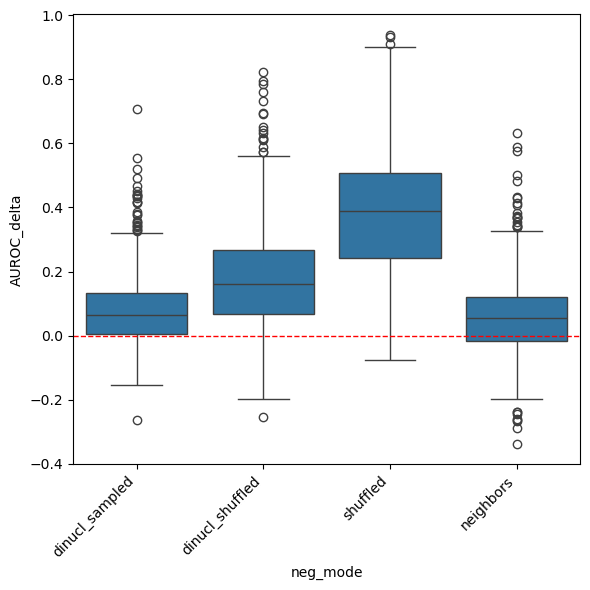

In [176]:
plt.figure(figsize=(6, 6))
# Create the boxplot
sns.boxplot(data=results_df, x='neg_mode', y='AUROC_delta')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)

# Adjust plot aesthetics
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

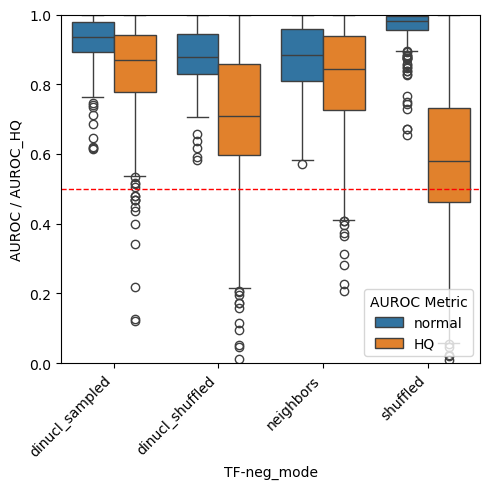

In [177]:
# Create the boxplot for AUROC
plt.figure(figsize=(5, 5))

# Create a new DataFrame with AUROC and AUROC_HQ combined into a single column
melted_df = pd.melt(
    results_df.sort_values(by=['TF-neg_mode']),
    id_vars=['neg_mode'],
    value_vars=['AUROC', 'AUROC_HQ'],
    var_name='auroc_metric',
    value_name='AUROC_value'
)

# Map the metric names to more descriptive labels
melted_df['auroc_metric'] = melted_df['auroc_metric'].map({'AUROC': 'normal', 'AUROC_HQ': 'HQ'})


# Create the boxplot
sns.boxplot(data=melted_df, x='neg_mode', y='AUROC_value', hue='auroc_metric')



# Add a horizontal line at y=0.5
plt.axhline(y=0.5, color='red', linestyle='--', linewidth=1)

# Adjust legend
plt.legend(title='AUROC Metric', loc='lower right')

# Adjust plot aesthetics
plt.xticks(rotation=45, ha='right')
plt.xlabel('TF-neg_mode')

plt.ylabel('AUROC / AUROC_HQ')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


In [178]:
import os

# Define the folder path
folder_path = "/data/home/natant/Negatives/Runs/full_run_1/motifs"

# Get a list of all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Load each CSV file into a dictionary of DataFrames
dataframes = {os.path.splitext(f)[0]: pd.read_csv(os.path.join(folder_path, f)) for f in csv_files}
dataframes = {name: df.rename(columns={"Unnamed: 0": "TF"}) for name, df in dataframes.items()}

# Print the names of the loaded DataFrames
print(f"Loaded DataFrames: {list(dataframes.keys())}")

Loaded DataFrames: ['HEK293', 'MCF-7', 'A549', 'GM12878', 'K562', 'HepG2']


In [179]:
# Initialize an empty list to store DataFrames
merged_dfs = []

# Iterate through the CSV files and process each one
for celltype in csv_files:
    # Extract the cell type name (without the .csv extension)
    celltype_name = os.path.splitext(celltype)[0]
    
    # Load the DataFrame for the current cell type
    df = pd.melt(
        dataframes[celltype_name],
        id_vars=['TF'],
        value_vars=['AUROC_1', 'AUROC_2', 'AUROC_3'],
        value_name='AUROC'
    )
    
    # Drop unnecessary columns and rows with NaN values
    df = df.dropna().drop(columns=['variable'])
    
    # Add additional columns for cell type and neg_mode
    df['celltype'] = celltype_name
    df['neg_mode'] = 'motif'
    
    # Append the processed DataFrame to the list
    merged_dfs.append(df)

# Concatenate all the DataFrames into a single DataFrame
motif_df = pd.concat(merged_dfs, ignore_index=True)

In [180]:
subset_df = results_df[(results_df['celltype'].isin(motif_df["celltype"].unique())) & (results_df['TF'].isin(motif_df['TF'].unique()))]
# Concatenate subset_df and melted_df, keeping only the specified columns
subset_df = subset_df[['TF', 'AUROC_HQ', 'neg_mode', 'celltype']]
subset_df = subset_df.rename(columns={"AUROC_HQ": "AUROC"})
fused_df = pd.concat([subset_df[['TF', 'AUROC', 'neg_mode', 'celltype']], motif_df[['TF', 'AUROC', 'neg_mode', 'celltype']]])

# Reset the index for the new DataFrame
fused_df.reset_index(drop=True, inplace=True)


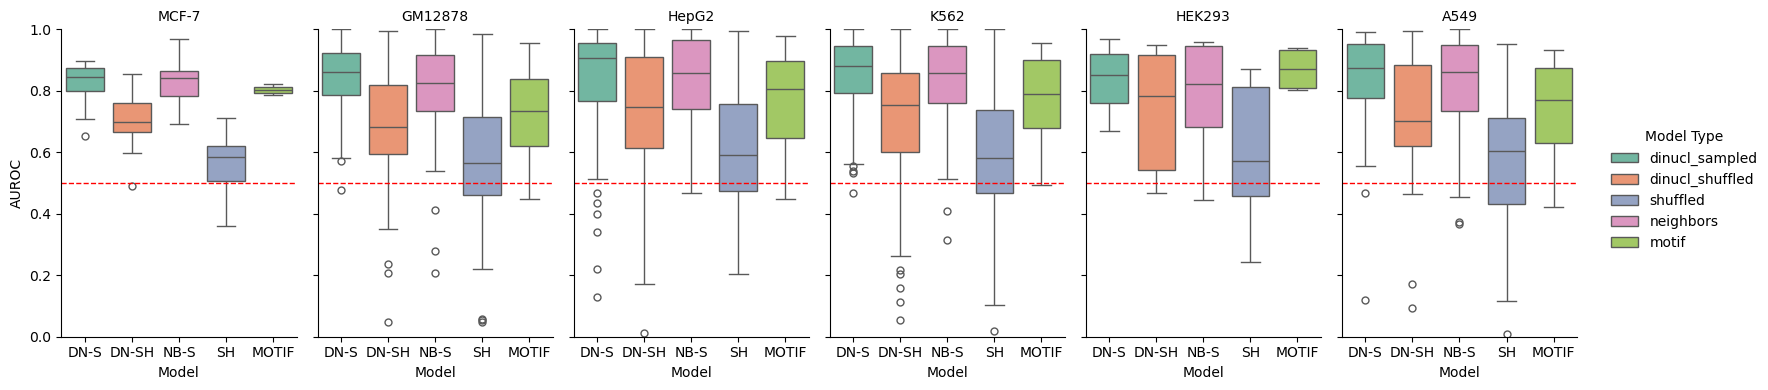

In [181]:
# Shorten neg_mode labels
neg_mode_labels = {
    'dinucl_sampled': 'DN-S',
    'dinucl_shuffled': 'DN-SH',
    'neighbors': 'NB-S',
    'shuffled': 'SH',
    'motif': "MOTIF"
}

# Apply and order short labels
fused_df['neg_mode_short'] = fused_df['neg_mode'].map(neg_mode_labels)
neg_mode_order = ['DN-S', 'DN-SH', 'NB-S', 'SH', 'MOTIF']
fused_df['neg_mode_short'] = pd.Categorical(fused_df['neg_mode_short'], categories=neg_mode_order, ordered=True)

g = sns.catplot(
        data=fused_df,
        x='neg_mode_short',
        col='celltype',
        y='AUROC',
        hue='neg_mode',
        kind='box',
        height=4,
        aspect=0.6,
        palette='Set2'
    )
# Titles and labels
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Model", "AUROC")

# Fix x-tick rotation manually
# for ax in g.axes.flatten():
#     for label in ax.get_xticklabels():
#         label.set_rotation(90)
#     ax.axhline(0.5, linestyle='--', color='red', linewidth=1)
# Adjust legend placement to avoid overlapping
g._legend.set_bbox_to_anchor((1, 0.5))
g._legend.set_loc("center left")
# Rename the legend title
g._legend.set_title("Model Type")

# Scale the y-axis from 0 to 1
g.set(ylim=(0, 1))

# Add a red line at y=0.5
for ax in g.axes.flatten():
    ax.axhline(0.5, linestyle='--', color='red', linewidth=1)
plt.tight_layout()
plt.show()

## Checking HQ data (only for 1 celltype right now)

In [ ]:
# Concatenate HQ_results with results_df
combined_results = pd.concat([results_df, HQ_results], ignore_index=True)

# If you want to include it in fused_df, ensure the columns match
HQ_results['neg_mode_short'] = "HQ training"  # Add the short label for neg_mode
fused_df = pd.concat([fused_df, HQ_results[['TF', 'AUROC', 'neg_mode', 'celltype', 'neg_mode_short']]], ignore_index=True)

# Reset the index for consistency
fused_df.reset_index(drop=True, inplace=True)

In [211]:
HQ_results_melted= HQ_results[["TF", "neg_mode", "AUROC"]]
HQ_results_melted = HQ_results_melted.rename(columns={"AUROC": "AUROC_value"})
HQ_results_melted["neg_mode_short"] = "HQ"
HQ_results_melted["auroc_metric"] = "HQ (t)"

/tmp/ipykernel_2379175/700031572.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  celltype_df['TF'] = pd.Categorical(celltype_df['TF'], categories=tf_order, ordered=True)
/tmp/ipykernel_2379175/700031572.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  celltype_df['neg_mode'] = pd.Categorical(celltype_df['neg_mode'], categories=neg_sampling_order, ordered=True)


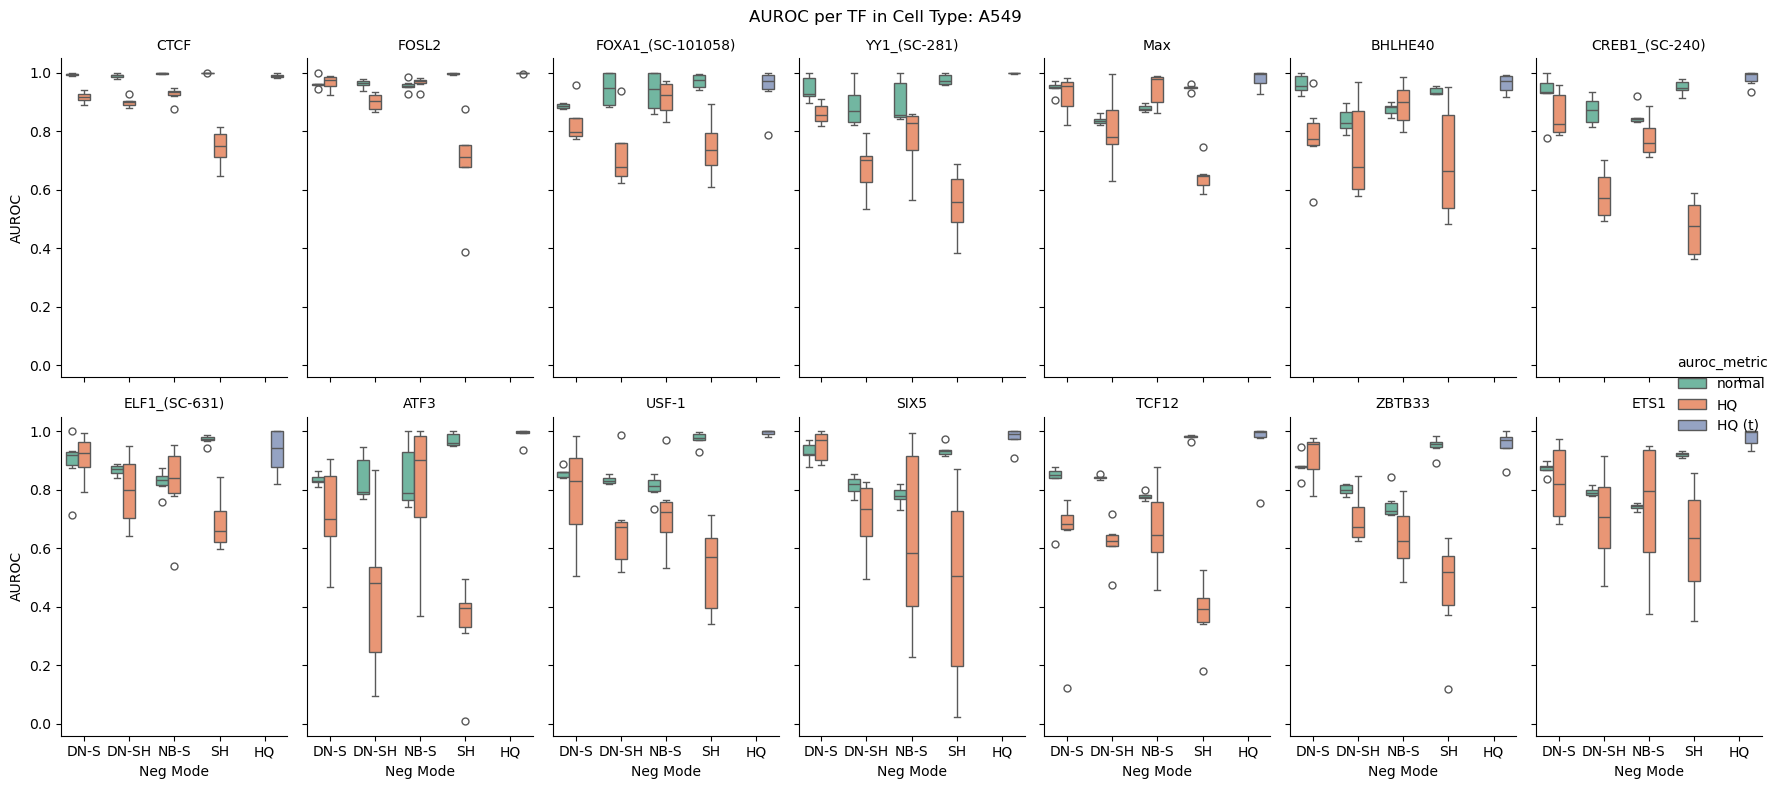

In [212]:
celltype = "A549"
# Filter the DataFrame for the current cell type
celltype_df = results_df[results_df['celltype'] == celltype]
mean_auroc_per_tf = celltype_df.groupby('TF')['AUROC'].mean().sort_values(ascending=False)
tf_order = mean_auroc_per_tf.index.tolist()

# Create a custom order for neg_sampling types
neg_sampling_order = ['dinucl_sampled', 'dinucl_shuffled', 'neighbors', 'shuffled']

# Sort the DataFrame by TF (using the custom order) and neg_sampling type
celltype_df['TF'] = pd.Categorical(celltype_df['TF'], categories=tf_order, ordered=True)
celltype_df['neg_mode'] = pd.Categorical(celltype_df['neg_mode'], categories=neg_sampling_order, ordered=True)
celltype_df = celltype_df.sort_values(['TF', 'neg_mode'])

# Create a new DataFrame with AUROC and AUROC_HQ combined into a single column
melted_df = pd.melt(
    celltype_df.sort_values(by=['TF', 'neg_mode']),
    id_vars=['TF', 'neg_mode'],
    value_vars=['AUROC', 'AUROC_HQ'],
    var_name='auroc_metric',
    value_name='AUROC_value'
)

# Map the metric names to more descriptive labels
melted_df['auroc_metric'] = melted_df['auroc_metric'].map({'AUROC': 'normal', 'AUROC_HQ': 'HQ'})

# Shorten neg_mode labels
neg_mode_labels = {
    'dinucl_sampled': 'DN-S',
    'dinucl_shuffled': 'DN-SH',
    'neighbors': 'NB-S',
    'shuffled': 'SH'
}

# Apply and order short labels
melted_df['neg_mode_short'] = melted_df['neg_mode'].map(neg_mode_labels)
neg_mode_order = ['DN-S', 'DN-SH', 'NB-S', 'SH', "HQ"]

melted_df = pd.concat([melted_df, HQ_results_melted], ignore_index=True) #! adding the HQ results
melted_df['neg_mode_short'] = pd.Categorical(melted_df['neg_mode_short'], categories=neg_mode_order, ordered=True)

# Create the catplot
g = sns.catplot(
    data=melted_df,
    x='neg_mode_short',
    col='TF',
    y='AUROC_value',
    hue='auroc_metric',
    kind='box',
    col_wrap=7,
    height=4,
    aspect=0.6,
    palette='Set2'
)

# Titles and labels
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Neg Mode", "AUROC")

# Fix x-tick rotation manually
# for ax in g.axes.flatten():
#     for label in ax.get_xticklabels():
#         label.set_rotation(90)
#     ax.axhline(0.5, linestyle='--', color='red', linewidth=1)
g.fig.suptitle(f"AUROC per TF in Cell Type: {celltype}")
plt.tight_layout()
plt.show()

## Now also making the figure with the motifs and adding the HQs!

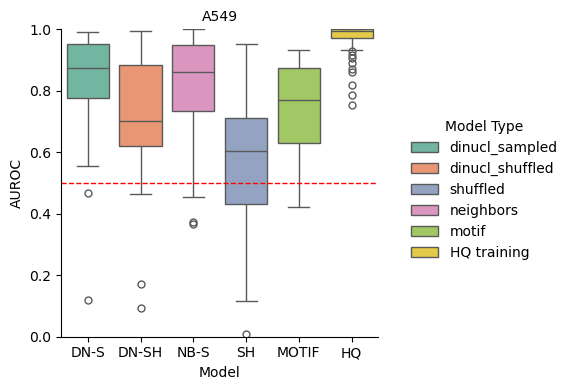

In [218]:
# Shorten neg_mode labels
neg_mode_labels = {
    'dinucl_sampled': 'DN-S',
    'dinucl_shuffled': 'DN-SH',
    'neighbors': 'NB-S',
    'shuffled': 'SH',
    'motif': "MOTIF"
}

# Apply and order short labels
fused_df['neg_mode_short'] = fused_df['neg_mode'].map(neg_mode_labels)
neg_mode_order = ['DN-S', 'DN-SH', 'NB-S', 'SH', 'MOTIF', 'HQ']

HQ_results_melted["celltype"] = "A549"
fused_df = pd.concat([fused_df, HQ_results_melted.rename(columns={"AUROC_value": "AUROC"}).drop(columns=["auroc_metric"])], ignore_index=True) #! adding the HQ results
fused_df['neg_mode_short'] = pd.Categorical(fused_df['neg_mode_short'], categories=neg_mode_order, ordered=True)

g = sns.catplot(
        data=fused_df,
        x='neg_mode_short',
        col='celltype',
        y='AUROC',
        hue='neg_mode',
        kind='box',
        height=4,
        aspect=0.6,
        palette='Set2'
    )
# Titles and labels
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Model", "AUROC")

# Fix x-tick rotation manually
# for ax in g.axes.flatten():
#     for label in ax.get_xticklabels():
#         label.set_rotation(90)
#     ax.axhline(0.5, linestyle='--', color='red', linewidth=1)
# Adjust legend placement to avoid overlapping
g._legend.set_bbox_to_anchor((1, 0.5))
g._legend.set_loc("center left")
# Rename the legend title
g._legend.set_title("Model Type")

# Scale the y-axis from 0 to 1
g.set(ylim=(0, 1))

# Add a red line at y=0.5
for ax in g.axes.flatten():
    ax.axhline(0.5, linestyle='--', color='red', linewidth=1)
plt.tight_layout()
plt.show()

In [217]:
fused_df

,TF,AUROC,neg_mode,celltype,neg_mode_short
0,CTCF,0.889178,dinucl_sampled,A549,DN-S
1,CTCF,0.911622,dinucl_sampled,A549,DN-S
2,CTCF,0.930167,dinucl_sampled,A549,DN-S
3,CTCF,0.903679,dinucl_sampled,A549,DN-S
4,CTCF,0.939884,dinucl_sampled,A549,DN-S
...,...,...,...,...,...
387,FOXA1_(SC-101058),0.998039,HQ training,NaN,HQ
388,FOXA1_(SC-101058),0.981248,HQ training,NaN,HQ
389,FOXA1_(SC-101058),0.938614,HQ training,NaN,HQ
390,FOXA1_(SC-101058),0.965008,HQ training,NaN,HQ
